In [123]:
import pandas as pd
import numpy as np

import requests

In [124]:
import os
import sys

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

In [125]:
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from folium.plugins import HeatMapWithTime



In [126]:
#Create function to generate map base
def generateBaseMap(default_location=[-9.488560, -18.826032], default_zoom_start=1):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start, tiles = "CartoDB positron")
    return base_map

#Create a function to generate de datatype and null values
def essential_df(df):
    print('INFO DATATYPE')
    print(df.info())
    print("__________________________________"+ '\nNULL VALUES BY COLUMN')
    print(df.isnull().sum())
    
# I do a function to see the value count of each column
def allthevalues(data):
    for i in data.columns:
        print(i)
        print(data[i].value_counts())
        print("_______________________________________")

In [127]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 20)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('max_info_columns', 20)

In [128]:
import chart_studio
import chart_studio.plotly as py

import sys
sys.path.insert(0, 'D:/Data Course/Functions')

from My_functions_EDA import *
from fx_MLRegression import *

In [129]:
teamcolor_dict = { 'N. America East': 'rgb(179, 226, 205)','N. America West': 'rgb(179, 226, 205)', 'N. America': 'rgb(179, 226, 205)',
                  'Europe': 'rgb(223, 226, 177)', 'Central/S. America': 'rgb(226, 177, 199)',  'Asia Pacific': 'rgb(180, 177, 226)'}
color_dict = { 'Yes': '#e07a5f','No': '#3d405b'}

# Import Data 

## Data Historical

- 00 - **GPA**        *Data Numerical Continuous*
- 01 - **Weigth**     *Data Numerical Continuous*
- 02 - **Rank**       *Data Numerical Discrete*  
- 03 - **Name**       *Data Categorical Nominal*
- 04 - **City_old**   *Data Categorical Nominal*
- 05 - **Region**     *Data Categorical Nominal*
- 06 - **G**          *Data Numerical Discrete*
- 07 - **Win**        *Data Numerical Discrete*
- 08 - **Los**        *Data Numerical Discrete*
- 09 - **Year**       *Data Numerical Date*
- 10 - **City**       *Data Categorical Nominal*
- 11 - **CityCode**   *Data Categorical Nominal*
- 12 - **Country**    *Data Categorical Nominal*
- 13 - **Longitude**  *Data Numerical Continuous*
- 14 - **Latitude**   *Data Numerical Continuous*

In [130]:
# Load the data
data_hist = pd.read_csv("../datasets/01-WFTDA-historical.csv")
# Drop the unnamed column
data_hist.drop(columns = "Unnamed: 0", axis = 1, inplace=True)
data_hist

GPA  \
0     484.22   
1     404.37   
2     377.71   
3     361.71   
4     334.51   
...      ...   
7732   36.70   
7733   31.05   
7734   28.24   
7735   15.91   
7736   14.48   

      Weigth  \
0       1.99   
1       1.98   
2       1.96   
3       1.95   
4       1.94   
...      ...   
7732    0.50   
7733    0.50   
7734    0.50   
7735    0.50   
7736    0.50   

      Rank  \
0        1   
1        2   
2        3   
3        4   
4        5   
...    ...   
7732   350   
7733   351   
7734   352   
7735   353   
7736   354   

                Name  \
0             Gotham   
1             Denver   
2                Oly   
3           Bay_Area   
4         Angel_City   
...              ...   
7732       Hurricane   
7733     Miss_Valley   
7734  Kaiserslautern   
7735      Gothenburg   
7736   Rough_Diamond   

                      City_old  \
0        New York City, NY, US   
1               Denver, CO, US   
2              Olympia, WA, US   
3              Oakland, CA, US   
4          Los Angeles, CA, US   
...                        ...   
7732    Corpus Christi, TX, US   
7733          LaCrosse, WI, US   
7734  Rhineland-Pfalz, Germany   
7735        Gothenburg, Sweden   
7736          Murrieta, CA, US   

          Region  \
0     N. America   
1     N. America   
2     N. America   
3     N. America   
4     N. America   
...          ...   
7732  N. America   
7733  N. America   
7734      Europe   
7735      Europe   
7736  N. America   

       G  Win  \
0     16   16   
1     15   12   
2     11   10   
3     14   11   
4     17   13   
...   ..  ...   
7732   2    0   
7733   4    0   
7734   2    0   
7735   2    0   
7736   2    0   

      Los  \
0       0   
1       3   
2       1   
3       3   
4       4   
...   ...   
7732    2   
7733    4   
7734    2   
7735    2   
7736    2   

            Year  \
0     2013-06-01   
1     2013-06-01   
2     2013-06-01   
3     2013-06-01   
4     2013-06-01   
...          ...   
7732  2019-09-01   
7733  2019-09-01   
7734  2019-09-01   
7735  2019-09-01   
7736  2019-09-01   

                 City  \
0       New York City   
1              Denver   
2             Olympia   
3             Oakland   
4         Los Angeles   
...               ...   
7732   Corpus Christi   
7733         LaCrosse   
7734  Rhineland-Pfalz   
7735       Gothenburg   
7736         Murrieta   

     CityCode  \
0          NY   
1          CO   
2          WA   
3          CA   
4          CA   
...       ...   
7732       TX   
7733       WI   
7734      NaN   
7735      NaN   
7736       CA   

      Country  \
0         USA   
1         USA   
2         USA   
3         USA   
4         USA   
...       ...   
7732      USA   
7733      USA   
7734  Germany   
7735   Sweden   
7736      USA   

      Longitude  \
0        -74.01   
1       -104.98   
2       -122.90   
3       -122.27   
4       -118.24   
...         ...   
7732     -97.40   
7733     -91.10   
7734       7.84   
7735      11.97   
7736    -117.19   

      Latitude  
0        40.71  
1        39.74  
2        47.05  
3        37.80  
4        34.05  
...        ...  
7732     27.75  
7733     43.90  
7734     50.22  
7735     57.71  
7736     33.58  

[7737 rows x 15 columns]

In [131]:
#see the essential from the df
essential_df(data_hist)

INFO DATATYPE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7737 entries, 0 to 7736
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GPA        7737 non-null   object 
 1   Weigth     7737 non-null   float64
 2   Rank       7737 non-null   int64  
 3   Name       7737 non-null   object 
 4   City_old   7737 non-null   object 
 5   Region     7737 non-null   object 
 6   G          7737 non-null   int64  
 7   Win        7737 non-null   int64  
 8   Los        7737 non-null   int64  
 9   Year       7737 non-null   object 
 10  City       7737 non-null   object 
 11  CityCode   6190 non-null   object 
 12  Country    7737 non-null   object 
 13  Longitude  7737 non-null   float64
 14  Latitude   7737 non-null   float64
dtypes: float64(3), int64(4), object(8)
memory usage: 906.8+ KB
None
__________________________________
NULL VALUES BY COLUMN
GPA             0
Weigth          0
Rank            0
Name            0
C

In [132]:
# Sort the df by year first and Rank latter
data_hist = data_hist.sort_values(by=["Year", "Rank"]).reset_index(drop=True)

In [133]:
#The number bigger than 1000 have ',' so they are recognized as object
dferror = [x for x in  data_hist.GPA if len(x) > 6]  
dferror[0:5]

['1,011.11', '1,040.54', '1,017.15', '1,035.10', '1,027.18']

In [134]:
#to delete the ',' replaced by nothing ''
data_hist["GPA"] = data_hist.GPA.str.replace(",", "")
#change the type of GPA from object to float
data_hist["GPA"] = data_hist.GPA.astype(float)

In [135]:
#change the type of Year from object to datetime
data_hist.Year = pd.to_datetime(data_hist.Year, format='%Y-%m-%d')

## Time Line

- 01 - **Region**     *Data Categorical Nominal*
- 02 - **Year**       *Data Numerical Date*
- 03 - **count**          *Data Numerical Discrete*


In [136]:
# Add the name of the file
dfcount = pd.read_csv("../datasets/01-timeseries.csv")
# Drop the unnamed column
dfcount.drop(columns = "Unnamed: 0", axis = 1, inplace=True)
#Change the name to makeit easy to recognize
dfcount.columns  = ['Year', 'Region', 'count']

In [137]:
# Sort the df by year first and region latter
dfcount = dfcount.sort_values(by=["Year", "Region"]).reset_index(drop=True)
dfcount

Year  \
0    2013-06-01   
1    2013-06-01   
2    2013-06-01   
3    2013-06-01   
4    2013-06-01   
..          ...   
130  2019-12-01   
131  2019-12-01   
132  2019-12-01   
133  2019-12-01   
134  2019-12-01   

                 Region  \
0          Asia Pacific   
1    Central/S. America   
2                Europe   
3       N. America East   
4       N. America West   
..                  ...   
130        Asia Pacific   
131  Central/S. America   
132              Europe   
133     N. America East   
134     N. America West   

     count  
0        1  
1        0  
2       12  
3       88  
4       65  
..     ...  
130     17  
131      2  
132     71  
133    159  
134    119  

[135 rows x 3 columns]

In [138]:
#see the essential from the df
essential_df(dfcount)

INFO DATATYPE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    135 non-null    object
 1   Region  135 non-null    object
 2   count   135 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.3+ KB
None
__________________________________
NULL VALUES BY COLUMN
Year      0
Region    0
count     0
dtype: int64


## Arenas

- 01 - **Lat_Long**  *Data Numerical Continuous*
- 02 - **Cantidad**        *Data Numerical Continuous*
- 03 - **Longitude**  *Data Numerical Continuous*
- 04 - **Latitude**   *Data Numerical Continuous*
- 05 - **Region**     *Data Categorical Nominal*


In [139]:
# Load the data
arena = pd.read_csv("../datasets/01-HomeArenas.csv")
# Drop the unnamed column
arena.drop(columns = "Unnamed: 0", axis = 1, inplace=True)
arena

Lat_Long  \
0     40.1582, -75.0152   
1    44.0505, -123.0951   
2       48.8567, 2.3515   
3     45.4972, -73.6104   
4      60.1674, 24.9426   
..                  ...   
327   41.5538, -73.0438   
328  -41.2888, 174.7772   
329   42.5083, -89.0318   
330   40.7127, -74.0060   
331  40.4233, -104.7091   

     Cantidad  \
0          53   
1          48   
2          46   
3          44   
4          42   
..        ...   
327         1   
328         1   
329         1   
330         1   
331         1   

     Latitude  \
0       40.16   
1       44.05   
2       48.86   
3       45.50   
4       60.17   
..        ...   
327     41.55   
328    -41.29   
329     42.51   
330     40.71   
331     40.42   

     Longitude  \
0       -75.02   
1      -123.10   
2         2.35   
3       -73.61   
4        24.94   
..         ...   
327     -73.04   
328     174.78   
329     -89.03   
330     -74.01   
331    -104.71   

           Region  
0      N. America  
1      N. America  
2          Europe  
3      N. America  
4          Europe  
..            ...  
327    N. America  
328  Asia Pacific  
329    N. America  
330    N. America  
331    N. America  

[332 rows x 5 columns]

In [140]:
#see the essential from the df
essential_df(arena)

INFO DATATYPE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Lat_Long   332 non-null    object 
 1   Cantidad   332 non-null    int64  
 2   Latitude   332 non-null    float64
 3   Longitude  332 non-null    float64
 4   Region     332 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 13.1+ KB
None
__________________________________
NULL VALUES BY COLUMN
Lat_Long     0
Cantidad     0
Latitude     0
Longitude    0
Region       0
dtype: int64


## Games

In [141]:
# Load the data
game = pd.read_csv("../datasets/01-Games_.csv")
# Drop the unnamed column
game.drop(columns = "Unnamed: 0", axis = 1, inplace=True)
game

Date  \
0     2019-02-16   
1     2019-02-16   
2     2019-02-16   
3     2019-02-16   
4     2019-02-16   
...          ...   
1795  2019-11-23   
1796  2019-11-23   
1797  2019-11-23   
1798  2019-11-23   
1799  2019-11-17   

                   H_Team  \
0     Fernie_Roller_Derby   
1              Bellingham   
2     Fernie_Roller_Derby   
3                   Gorge   
4                Roc_City   
...                   ...   
1795                Namur   
1796                Namur   
1797                Namur   
1798                Namur   
1799             Montréal   

             V_Team  \
0             Gorge   
1     Eves_Destruct   
2        Bellingham   
3     Eves_Destruct   
4       Orangeville   
...             ...   
1795          Leeds   
1796  Royal Swedish   
1797         Nantes   
1798          Namur   
1799      Rose City   

                      Tournament  \
0                              0   
1                              0   
2                              0   
3                              0   
4                              0   
...                          ...   
1795           Skate_Around_Tour   
1796           Skate_Around_Tour   
1797           Skate_Around_Tour   
1798           Skate_Around_Tour   
1799  International_WFTDA_Champs   

         WFTDA_H  \
0         Fernie   
1     Bellingham   
2         Fernie   
3          Gorge   
4       Roc_City   
...          ...   
1795       Namur   
1796       Namur   
1797       Namur   
1798       Namur   
1799    Montréal   

            WFTDA_V  \
0             Gorge   
1     Eves_Destruct   
2        Bellingham   
3     Eves_Destruct   
4       Orangeville   
...             ...   
1795          Leeds   
1796  Royal_Swedish   
1797         Nantes   
1798          Namur   
1799      Rose_City   

                 City_Home  \
0       Fernie, BC, Canada   
1       Bellingham, WA, US   
2       Fernie, BC, Canada   
3       Hood River, OR, US   
4        Rochester, NY, US   
...                    ...   
1795        Namur, Belgium   
1796        Namur, Belgium   
1797        Namur, Belgium   
1798        Namur, Belgium   
1799  Montreal, QC, Canada   

     Region_Home  \
0     N. America   
1     N. America   
2     N. America   
3     N. America   
4     N. America   
...          ...   
1795      Europe   
1796      Europe   
1797      Europe   
1798      Europe   
1799  N. America   

      Longitude_Home  \
0            -115.06   
1            -122.48   
2            -115.06   
3            -121.51   
4             -77.62   
...              ...   
1795            4.87   
1796            4.87   
1797            4.87   
1798            4.87   
1799          -73.61   

      Latitude_Home  \
0             49.50   
1             48.75   
2             49.50   
3             45.71   
4             43.16   
...             ...   
1795          50.47   
1796          50.47   
1797          50.47   
1798          50.47   
1799          45.50   

      ...  \
0     ...   
1     ...   
2     ...   
3     ...   
4     ...   
...   ...   
1795  ...   
1796  ...   
1797  ...   
1798  ...   
1799  ...   

      Latitude_Visi  \
0             45.71   
1             48.43   
2             48.75   
3             48.43   
4             43.92   
...             ...   
1795          53.80   
1796          59.33   
1797          47.22   
1798          50.47   
1799          45.52   

     Ranked_V  \
0           1   
1           1   
2           1   
3           1   
4           0   
...       ...   
1795        1   
1796        1   
1797        1   
1798        1   
1799        1   

                    Dates  \
0                     NaN   
1                     NaN   
2                     NaN   
3                     NaN   
4                     NaN   
...                   ...   
1795  11/23/19 - 11/24/19   
1796  11/23/19 - 11/24/19   
1797  11/23/19 - 11/24/19   
1798  11/23/19 - 11/24/19   
1799  11/15/19 - 11/17/19   

             Class  \
0              N

In [142]:
# Sort the df by date first and Tournament latter
game = game.sort_values(by=["Date", "Tournament"]).reset_index(drop=True)

In [143]:
#see the essential from the df
essential_df(game)

INFO DATATYPE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Columns: 24 entries, Date to day_name
dtypes: float64(5), int64(4), object(15)
memory usage: 337.6+ KB
None
__________________________________
NULL VALUES BY COLUMN
Date                 0
H_Team              35
V_Team               0
Tournament           0
WFTDA_H             35
WFTDA_V              0
City_Home            0
Region_Home          1
Longitude_Home       0
Latitude_Home        0
Ranked_H          1164
City_Visi            0
Region_Visi          0
Longitude_Visi       0
Latitude_Visi        0
Ranked_V             0
Dates              625
Class              637
YES                625
Country_Home         0
Maps                 0
month                0
week                 0
day_name             0
dtype: int64


In [144]:
#Drop the columns 'Ranked_H','Ranked_V', "H_Team", "V_Team" because repeat info 
game.drop(columns=['Ranked_H','Ranked_V', "H_Team", "V_Team"], axis=1, inplace=True)

In [145]:
#check the NaN in the Region_Home
game[game.Region_Home.isnull()]

Date  \
617  2019-05-04   

    Tournament  \
617          0   

          WFTDA_H  \
617  Convict_City   

                    WFTDA_V  \
617  South_Sea_Roller_Derby   

           City_Home  \
617  South Australia   

    Region_Home  \
617         NaN   

     Longitude_Home  \
617          135.63   

     Latitude_Home  \
617         -30.53   

                     City_Visi  \
617  Melbourne, VIC, Australia   

      Region_Visi  \
617  Asia Pacific   

     Longitude_Visi  \
617          144.96   

     Latitude_Visi  \
617         -37.81   

    Dates Class  \
617   NaN   NaN   

     YES  \
617  NaN   

        Country_Home  \
617  South Australia   

                   Maps  \
617  -30.5344, 135.6301   

     month  week  \
617      5    18   

     day_name  
617         5

In [146]:
#add the region manually changing the value from null to Asia P
game.loc[(game.City_Home == "South Australia"), "Region_Home"] = 'Asia Pacific'

In [147]:
#There is two Rainy_City teams and the city is not the same
game.loc[(game.WFTDA_H == "Rainy_City") , "City_Home"].unique()

array(['Manchester, UK', 'Manchester, England', 'Centralia, WA, US'],
      dtype=object)

In [148]:
#Change the name of the team from Centralia, WA, US
game.loc[(game.WFTDA_H == "Rainy_City") & (game.City_Home == "Centralia, WA, US") , "WFTDA_H"] = "Rainy_City_Roller_Dolls"
game.loc[(game.WFTDA_V == "Rainy_City") & (game.City_Visi == "Centralia, WA, US") , "WFTDA_V"] = "Rainy_City_Roller_Dolls"

In [149]:
#In the tournamentes the row could contain the visitor team as the home team. 
#select only the rows where the team local an visitor not be equal
game = game.loc[game.WFTDA_V != game.WFTDA_H ,:].reset_index(drop=True)
game

Date  \
0     2019-01-05   
1     2019-01-19   
2     2019-01-20   
3     2019-01-26   
4     2019-01-26   
...          ...   
1662  2019-12-14   
1663  2019-12-14   
1664  2019-12-14   
1665  2019-12-14   
1666  2019-12-22   

         Tournament  \
0                 0   
1                 0   
2                 0   
3                 0   
4     French_Champs   
...             ...   
1662              0   
1663              0   
1664              0   
1665              0   
1666              0   

                  WFTDA_H  \
0              Fox_Cities   
1              Bellingham   
2                Dockyard   
3               Kalamazoo   
4                    Caen   
...                   ...   
1662    Nice_Roller_Derby   
1663               B.M.O.   
1664  Roller_Derby_Rennes   
1665           Go-Go_Gent   
1666              Antwerp   

                  WFTDA_V  \
0              Confluence   
1           Eves_Destruct   
2           Eves_Destruct   
3                 Cornfed   
4                  Nantes   
...                   ...   
1662  Roller_Derby_Torino   
1663              Panters   
1664              Panters   
1665            Rotterdam   
1666       Quads_de_Paris   

                   City_Home  \
0           Appleton, WI, US   
1         Bellingham, WA, US   
2             Tacoma, WA, US   
3          Kalamazoo, MI, US   
4               Caen, France   
...                      ...   
1662    Nice, France, France   
1663            Best, France   
1664  Rennes, France, France   
1665           Gent, Belgium   
1666        Antwerp, Belgium   

     Region_Home  \
0     N. America   
1     N. America   
2     N. America   
3     N. America   
4         Europe   
...          ...   
1662      Europe   
1663      Europe   
1664      Europe   
1665      Europe   
1666      Europe   

      Longitude_Home  \
0             -88.41   
1            -122.48   
2            -122.44   
3             -85.59   
4              -0.37   
...              ...   
1662            7.27   
1663            3.67   
1664           -1.68   
1665            3.73   
1666            4.40   

      Latitude_Home  \
0             44.26   
1             48.75   
2             47.25   
3             42.29   
4             49.18   
...             ...   
1662          43.70   
1663          45.44   
1664          48.11   
1665          51.05   
1666          51.22   

                   City_Visi  \
0          St. Louis, MO, US   
1       Victoria, BC, Canada   
2       Victoria, BC, Canada   
3             Muncie, IN, US   
4             Nantes, France   
...                      ...   
1662     Turin, Italy, Italy   
1663         Sannois, France   
1664         Sannois, France   
1665  Rotterdam, Netherlands   
1666           Paris, France   

     Region_Visi  \
0     N. America   
1     N. America   
2     N. America   
3     N. America   
4         Europe   
...          ...   
1662      Europe   
1663      Europe   
1664      Europe   
1665      Europe   
1666      Europe   

      Longitude_Visi  \
0             -90.24   
1            -123.36   
2            -123.36   
3             -85.39   
4              -1.55   
...              ...   
1662            7.67   
1663            2.26   
1664            2.26   
1665            4.46   
1666            2.35   

      Latitude_Visi  \
0             38.65   
1             48.43   
2             48.43   
3             40.19   
4             47.22   
...             ...   
1662          45.02   
1663          48.97   
1664          48.97   
1665          51.92   
1666          48.86   

                    Dates  \
0                     NaN   
1                     NaN   
2                     NaN   
3                     NaN   
4     11/01/18 - 05/31/19   
...                   ...   
1662                  NaN   
1663                  NaN   
1664                  NaN   
1665                  NaN   
1666                  NaN   

             Class  \
0              NaN   
1              NaN 

# DF COUNT

In [150]:
dfcount.describe().T

count  \
count 135.00   

       mean   std  \
count 57.31 52.95   

       min  25%  \
count 0.00 5.50   

        50%  \
count 39.00   

         75%  \
count 105.00   

         max  
count 159.00

In [151]:
#Do a new data set to check how many teams are there
scatter_total = dfcount.groupby("Year" ).sum().reset_index()

In [152]:
scatter_total

Year  \
0   2013-06-01   
1   2013-09-01   
2   2013-12-01   
3   2014-03-01   
4   2014-06-01   
5   2014-09-01   
6   2014-12-01   
7   2015-03-01   
8   2015-06-01   
9   2015-09-01   
10  2015-12-01   
11  2016-03-01   
12  2016-06-01   
13  2016-09-01   
14  2016-12-01   
15  2017-03-01   
16  2017-06-01   
17  2017-09-01   
18  2017-12-01   
19  2018-03-01   
20  2018-06-01   
21  2018-09-01   
22  2018-12-01   
23  2019-03-01   
24  2019-06-01   
25  2019-09-01   
26  2019-12-01   

    count  
0     166  
1     166  
2     176  
3     192  
4     205  
5     219  
6     225  
7     238  
8     265  
9     267  
10    275  
11    283  
12    290  
13    307  
14    320  
15    319  
16    331  
17    335  
18    339  
19    339  
20    348  
21    358  
22    352  
23    350  
24    350  
25    354  
26    368

In [153]:
#Change the name to identify better
scatter_total.columns = ["Year_Key", "Total"]
#Merge the two datasets 
dfcount = pd.merge(dfcount, scatter_total , how="inner", left_on="Year", right_on="Year_Key",)

In [154]:
dfcount

Year  \
0    2013-06-01   
1    2013-06-01   
2    2013-06-01   
3    2013-06-01   
4    2013-06-01   
..          ...   
130  2019-12-01   
131  2019-12-01   
132  2019-12-01   
133  2019-12-01   
134  2019-12-01   

                 Region  \
0          Asia Pacific   
1    Central/S. America   
2                Europe   
3       N. America East   
4       N. America West   
..                  ...   
130        Asia Pacific   
131  Central/S. America   
132              Europe   
133     N. America East   
134     N. America West   

     count  \
0        1   
1        0   
2       12   
3       88   
4       65   
..     ...   
130     17   
131      2   
132     71   
133    159   
134    119   

       Year_Key  \
0    2013-06-01   
1    2013-06-01   
2    2013-06-01   
3    2013-06-01   
4    2013-06-01   
..          ...   
130  2019-12-01   
131  2019-12-01   
132  2019-12-01   
133  2019-12-01   
134  2019-12-01   

     Total  
0      166  
1      166  
2      166  
3      166  
4      166  
..     ...  
130    368  
131    368  
132    368  
133    368  
134    368  

[135 rows x 5 columns]

In [155]:
#Do a dictonary with the percentage of the total bay region
dic = []
for i in dfcount.index:
    a = dfcount.iloc[i, 2]*100/dfcount.iloc[i, 4]
    dic.append("{:.2f}".format(a))
dic

['0.60',
 '0.00',
 '7.23',
 '53.01',
 '39.16',
 '0.60',
 '0.00',
 '6.63',
 '53.01',
 '39.76',
 '0.57',
 '0.00',
 '7.39',
 '53.98',
 '38.07',
 '0.52',
 '0.00',
 '7.29',
 '51.56',
 '40.62',
 '1.46',
 '0.49',
 '8.78',
 '51.22',
 '38.05',
 '1.37',
 '0.46',
 '8.68',
 '51.14',
 '38.36',
 '1.78',
 '0.44',
 '10.22',
 '50.22',
 '37.33',
 '2.52',
 '0.42',
 '10.08',
 '49.58',
 '37.39',
 '4.91',
 '0.38',
 '10.94',
 '48.30',
 '35.47',
 '4.87',
 '0.37',
 '10.86',
 '48.31',
 '35.58',
 '5.45',
 '0.36',
 '11.27',
 '48.36',
 '34.55',
 '5.30',
 '0.35',
 '11.66',
 '47.70',
 '34.98',
 '5.86',
 '0.34',
 '12.76',
 '46.21',
 '34.83',
 '5.86',
 '0.65',
 '12.70',
 '46.58',
 '34.20',
 '5.62',
 '0.62',
 '14.06',
 '45.94',
 '33.75',
 '5.64',
 '0.63',
 '14.73',
 '46.08',
 '32.92',
 '5.74',
 '1.51',
 '16.31',
 '43.81',
 '32.63',
 '5.37',
 '1.49',
 '17.91',
 '43.28',
 '31.94',
 '6.49',
 '1.47',
 '17.70',
 '43.36',
 '30.97',
 '6.19',
 '1.47',
 '17.11',
 '43.95',
 '31.27',
 '5.75',
 '1.15',
 '17.24',
 '43.68',
 '32.18'

In [156]:
#Create the new column with the percentage
dfcount["Percentage"] = dic

In [157]:
#Seeing the initial amount of leagues 
dfcount[dfcount.Year == "2013-06-01"]

Year  \
0  2013-06-01   
1  2013-06-01   
2  2013-06-01   
3  2013-06-01   
4  2013-06-01   

               Region  \
0        Asia Pacific   
1  Central/S. America   
2              Europe   
3     N. America East   
4     N. America West   

   count  \
0      1   
1      0   
2     12   
3     88   
4     65   

     Year_Key  \
0  2013-06-01   
1  2013-06-01   
2  2013-06-01   
3  2013-06-01   
4  2013-06-01   

   Total  \
0    166   
1    166   
2    166   
3    166   
4    166   

  Percentage  
0       0.60  
1       0.00  
2       7.23  
3      53.01  
4      39.16

In [158]:
#Seeing the final amount of leagues 
dfcount[dfcount.Year == "2019-12-01"]

Year  \
130  2019-12-01   
131  2019-12-01   
132  2019-12-01   
133  2019-12-01   
134  2019-12-01   

                 Region  \
130        Asia Pacific   
131  Central/S. America   
132              Europe   
133     N. America East   
134     N. America West   

     count  \
130     17   
131      2   
132     71   
133    159   
134    119   

       Year_Key  \
130  2019-12-01   
131  2019-12-01   
132  2019-12-01   
133  2019-12-01   
134  2019-12-01   

     Total  \
130    368   
131    368   
132    368   
133    368   
134    368   

    Percentage  
130       4.62  
131       0.54  
132      19.29  
133      43.21  
134      32.34

In [159]:
fig = px.bar(dfcount, x="Year", y="count", color='Region', color_discrete_map=teamcolor_dict, template="plotly_white",
                 title='Number of teams through the years', hover_data= ['Percentage'], 
             labels={'count':'Count', 'Percentage': 'Percentage of the total' })

fig.add_vrect(x0="2014-12-04", x1="2014-12-04", annotation_text="2014 RD World Cup <br>(Texas)")
fig.add_vrect(x0="2018-02-01", x1="2018-02-01", annotation_text="2018 RD World Cup <br>(Manchester)")

fig.add_trace(go.Scatter(
        x=scatter_total["Year_Key"],
        y=scatter_total["Total"],
        mode="markers+lines",
        name="Total",
        line=dict(
            color="black"
        )
    ))
fig.show()



In [160]:
fig.write_html("../Fig/01-Crecimiento.html")

In [161]:
more = pd.read_csv('../datasets/Flat_with location.csv')# Add the name of the file
more.drop(columns = "Unnamed: 0", axis = 1, inplace=True)
more

Team  \
0                     Windsor Roller Derby   
1                       Windy City Rollers   
2                    Wine Country Crushers   
3                        Wine Town Rollers   
4                         Wing City Angels   
...                                    ...   
2594  BBRD (W): Borderland Brawlers B Team   
2595               BRRD: Brighton Bruisers   
2596          BRRD: Brighton Rockerbillies   
2597                          BRRD: C-Side   
2598                     BRD: Bristol Bees   

                             Location  \
0                 Windsor, ON, Canada   
1                         Chicago, IL   
2                          Yakima, WA   
3                        Temecula, CA   
4      Brasília, Distrito Federal,...   
...                               ...   
2594  Oakham, Stamford and Peterbo...   
2595                     Brighton, UK   
2596                     Brighton, UK   
2597                     Brighton, UK   
2598                      Bristol, UK   

        Team Type  \
0     Travel Team   
1     Travel Team   
2     Travel Team   
3     Travel Team   
4     Travel Team   
...           ...   
2594       B Team   
2595       B Team   
2596       B Team   
2597       B Team   
2598       B Team   

          City  \
0      Windsor   
1      Chicago   
2       Yakima   
3     Temecula   
4     Brasília   
...        ...   
2594    Oakham   
2595  Brighton   
2596  Brighton   
2597  Brighton   
2598   Bristol   

                       CityCode  \
0                            ON   
1                            IL   
2                            WA   
3                            CA   
4              Distrito Federal   
...                         ...   
2594  Stamford and Peterborough   
2595                         UK   
2596                         UK   
2597                         UK   
2598                         UK   

             Country  \
0             Canada   
1                USA   
2                USA   
3                USA   
4             Brazil   
...              ...   
2594  United Kingdom   
2595  United Kingdom   
2596  United Kingdom   
2597  United Kingdom   
2598  United Kingdom   

                                combined  \
0                    Windsor, ON, Canada   
1                       Chicago, IL, USA   
2                        Yakima, WA, USA   
3                      Temecula, CA, USA   
4     Brasília, Distrito Federal, Brazil   
...                                  ...   
2594              Oakham, United Kingdom   
2595            Brighton, United Kingdom   
2596            Brighton, United Kingdom   
2597            Brighton, United Kingdom   
2598             Bristol, United Kingdom   

      Longitude  \
0        -83.04   
1        -87.62   
2       -120.51   
3       -117.15   
4        -47.88   
...         ...   
2594      -0.75   
2595      -0.14   
2596      -0.14   
2597      -0.14   
2598      -2.60   

      Latitude  \
0        42.32   
1        41.88   
2        46.60   
3        33.49   
4       -15.79   
...        ...   
2594     52.67   
2595     50.82   
2596     50.82   
2597     50.82   
2598     51.45   

                  Region  
0             N. America  
1             N. America  
2             N. America  
3             N. America  
4     Central/S. America  
...                  ...  
2594              Europe  
2595              Europe  
2596              Europe  
2597              Europe  
2598              Europe  

[2599 rows x 10 columns]

In [162]:
more["Team Type"].value_counts()

Travel Team    1809
B Team          790
Name: Team Type, dtype: int64

In [163]:
# Create the figure and feed it all the prepared columns
fig = px.scatter_mapbox(more,
        lat=more['Latitude'], zoom=0.4,
        lon=more['Longitude'], color='Team Type', title="Number of women in FlatTrackStats'page")



fig.update_layout(mapbox_style="carto-darkmatter")
fig.write_html("../Fig/00_FlatTrack_black.html")# Display
fig.show()

In [164]:
#Check the the distribution of the Regions
dfcount.groupby("Region").describe()

count  \
                   count   
Region                     
Asia Pacific       27.00   
Central/S. America 27.00   
Europe             27.00   
N. America East    27.00   
N. America West    27.00   

                           \
                     mean   
Region                      
Asia Pacific        12.85   
Central/S. America   2.04   
Europe              40.37   
N. America East    133.00   
N. America West     98.30   

                          \
                     std   
Region                     
Asia Pacific        7.23   
Central/S. America  1.65   
Europe             19.40   
N. America East    22.77   
N. America West    16.75   

                          \
                     min   
Region                     
Asia Pacific        1.00   
Central/S. America  0.00   
Europe             11.00   
N. America East    88.00   
N. America West    65.00   

                           \
                      25%   
Region                      
Asia Pacific         5.00   
Central/S. America   1.00   
Europe              23.50   
N. America East    115.50   
N. America West     86.50   

                           \
                      50%   
Region                      
Asia Pacific        16.00   
Central/S. America   2.00   
Europe              39.00   
N. America East    143.00   
N. America West    105.00   

                           \
                      75%   
Region                      
Asia Pacific        18.00   
Central/S. America   3.00   
Europe              59.00   
N. America East    150.50   
N. America West    110.00   

                           \
                      max   
Region                      
Asia Pacific        22.00   
Central/S. America   5.00   
Europe              71.00   
N. America East    159.00   
N. America West    119.00   

                   Total  \
                   count   
Region                     
Asia Pacific       27.00   
Central/S. America 27.00   
Europe             27.00   
N. America East    27.00   
N. America West    27.00   

                           \
                     mean   
Region                      
Asia Pacific       286.56   
Central/S. America 286.56   
Europe             286.56   
N. America East    286.56   
N. America West    286.56   

                          \
                     std   
Region                     
Asia Pacific       66.04   
Central/S. America 66.04   
Europe             66.04   
N. America East    66.04   
N. America West    66.04   

                           \
                      min   
Region                      
Asia Pacific       166.00   
Central/S. America 166.00   
Europe             166.00   
N. America East    166.00   
N. America West    166.00   

                           \
                      25%   
Region                      
Asia Pacific       231.50   
Central/S. America 231.50   
Europe             231.50   
N. America East    231.50   
N. America West    231.50   

                           \
                      50%   
Region                      
Asia Pacific       307.00   
Central/S. America 307.00   
Europe             307.00   
N. America East    307.00   
N. America West    307.00   

                           \
                      75%   
Region                      
Asia Pacific       343.50   
Central/S. America 343.50   
Europe             343.50   
N. America East    343.50   
N. America West    343.50   

                           
                      max  
Region                     
Asia Pacific       368.00  
Central/S. America 368.00  
Europe             368.00  
N. America East    368.00  
N. America West    368.00

In [165]:
#Boxplot 
fig = px.box(dfcount, x="Region", y="count", points="all", color= "Region",  template="plotly_white", 
             color_discrete_map=teamcolor_dict)
fig.show()

In [166]:
fig.write_image("../Fig/05-Region_members.png")

In [167]:
#See the max of the Asia Pacific
dfcount.loc[dfcount["Region"] == 22, :]

Empty DataFrame
Columns: [Year, Region, count, Year_Key, Total, Percentage]
Index: []

In [168]:
print(dfcount.loc[dfcount["count"] == 22, "Year"])
print(dfcount.loc[dfcount["count"] == 5, "Year"])
print(dfcount.loc[dfcount["count"] == 71, "Year"])
print(dfcount.loc[dfcount["count"] == 159, "Year"])
print(dfcount.loc[dfcount["count"] == 119, "Year"])

90    2017-12-01
Name: Year, dtype: object
81    2017-06-01
86    2017-09-01
91    2017-12-01
96    2018-03-01
Name: Year, dtype: object
132    2019-12-01
Name: Year, dtype: object
133    2019-12-01
Name: Year, dtype: object
134    2019-12-01
Name: Year, dtype: object


In [169]:
#Check the amount of years
dfcount.loc[dfcount["Year"] == "2019-12-01"]

Year  \
130  2019-12-01   
131  2019-12-01   
132  2019-12-01   
133  2019-12-01   
134  2019-12-01   

                 Region  \
130        Asia Pacific   
131  Central/S. America   
132              Europe   
133     N. America East   
134     N. America West   

     count  \
130     17   
131      2   
132     71   
133    159   
134    119   

       Year_Key  \
130  2019-12-01   
131  2019-12-01   
132  2019-12-01   
133  2019-12-01   
134  2019-12-01   

     Total  \
130    368   
131    368   
132    368   
133    368   
134    368   

    Percentage  
130       4.62  
131       0.54  
132      19.29  
133      43.21  
134      32.34

In [170]:
#
dfcount.loc[dfcount["Year"] == "2016-09-01"]

Year  \
65  2016-09-01   
66  2016-09-01   
67  2016-09-01   
68  2016-09-01   
69  2016-09-01   

                Region  \
65        Asia Pacific   
66  Central/S. America   
67              Europe   
68     N. America East   
69     N. America West   

    count  \
65     18   
66      2   
67     39   
68    143   
69    105   

      Year_Key  \
65  2016-09-01   
66  2016-09-01   
67  2016-09-01   
68  2016-09-01   
69  2016-09-01   

    Total  \
65    307   
66    307   
67    307   
68    307   
69    307   

   Percentage  
65       5.86  
66       0.65  
67      12.70  
68      46.58  
69      34.20

In [171]:
#
dfcount.loc[dfcount["Year"] == "2013-06-01"]

Year  \
0  2013-06-01   
1  2013-06-01   
2  2013-06-01   
3  2013-06-01   
4  2013-06-01   

               Region  \
0        Asia Pacific   
1  Central/S. America   
2              Europe   
3     N. America East   
4     N. America West   

   count  \
0      1   
1      0   
2     12   
3     88   
4     65   

     Year_Key  \
0  2013-06-01   
1  2013-06-01   
2  2013-06-01   
3  2013-06-01   
4  2013-06-01   

   Total  \
0    166   
1    166   
2    166   
3    166   
4    166   

  Percentage  
0       0.60  
1       0.00  
2       7.23  
3      53.01  
4      39.16

# DATAHIST

- 00 - **GPA**        *Data Numerical Continuous*
- 01 - **Weigth**     *Data Numerical Continuous*
- 02 - **Rank**       *Data Numerical Discrete*  
- 03 - **Name**       *Data Categorical Nominal*
- 04 - **City_old**   *Data Categorical Nominal*
- 05 - **Region**     *Data Categorical Nominal*
- 06 - **G**          *Data Numerical Discrete*
- 07 - **Win**        *Data Numerical Discrete*
- 08 - **Los**        *Data Numerical Discrete*
- 09 - **Year**       *Data Numerical Date*
- 10 - **City**       *Data Categorical Nominal*
- 11 - **CityCode**   *Data Categorical Nominal*
- 12 - **Country**    *Data Categorical Nominal*
- 13 - **Longitude**  *Data Numerical Continuous*
- 14 - **Latitude**   *Data Numerical Continuous*

In [172]:
data_hist.describe().T

count  \
GPA       7737.00   
Weigth    7737.00   
Rank      7737.00   
G         7737.00   
Win       7737.00   
Los       7737.00   
Longitude 7737.00   
Latitude  7737.00   

            mean  \
GPA       201.92   
Weigth      1.48   
Rank      151.11   
G           7.42   
Win         3.73   
Los         3.69   
Longitude -68.68   
Latitude   37.83   

             std  \
GPA       174.42   
Weigth      1.24   
Rank       93.34   
G           3.95   
Win         2.99   
Los         2.38   
Longitude  60.46   
Latitude   17.03   

              min  \
GPA          4.89   
Weigth       0.50   
Rank         1.00   
G            2.00   
Win          0.00   
Los          0.00   
Longitude -159.56   
Latitude   -45.87   

             25%  \
GPA        94.47   
Weigth      0.69   
Rank       72.00   
G           4.00   
Win         1.00   
Los         2.00   
Longitude -97.34   
Latitude   35.47   

             50%  \
GPA       138.12   
Weigth      1.02   
Rank      144.00   
G           7.00   
Win         3.00   
Los         3.00   
Longitude -83.92   
Latitude   40.27   

             75%  \
GPA       248.48   
Weigth      1.80   
Rank      223.00   
G          10.00   
Win         5.00   
Los         5.00   
Longitude -74.01   
Latitude   44.26   

              max  
GPA       1540.36  
Weigth      10.68  
Rank       368.00  
G           25.00  
Win         19.00  
Los         19.00  
Longitude  176.99  
Latitude    64.84

In [173]:
allthevalues(data_hist)

GPA
68.65     6
73.42     6
76.56     6
70.79     5
69.87     5
         ..
86.24     1
149.22    1
339.45    1
77.28     1
183.59    1
Name: GPA, Length: 5934, dtype: int64
_______________________________________
Weigth
0.50    831
0.78     82
0.61     81
0.74     77
0.73     75
       ... 
5.79      1
8.05      1
7.82      1
4.03      1
7.88      1
Name: Weigth, Length: 574, dtype: int64
_______________________________________
Rank
4      27
166    27
38     27
34     27
30     27
       ..
363     1
362     1
366     1
359     1
365     1
Name: Rank, Length: 368, dtype: int64
_______________________________________
Name
Des_Moines       28
Texas            27
Treasure_Vall    27
Pikes_Peak       27
Black_Rose       27
                 ..
Swansea_City      1
Beet_City         1
Des_Moines 2      1
B.M.O.            1
Faultline         1
Name: Name, Length: 453, dtype: int64
_______________________________________
City_old
Indianapolis, IN, US                   54
Denver, CO, US      

In [174]:
#Create a new row with the date that the team entry to the rank
data_hist["Fundation"]= data_hist.Name.apply(lambda x: data_hist.loc[(data_hist.Name == x), "Year"].min())

In [175]:
#Create a new row selecting only the year of the fundation
data_hist["Fund_Year"]= data_hist.Fundation.apply(lambda x: x.year)

In [176]:
#Create a dataframe with the data of the 2019/12
df = data_hist.loc[(data_hist.Year == "2019-12-01"), :]
df.Fundation.nunique()

27

In [177]:
data_hist

GPA  \
0    484.22   
1    404.37   
2    377.71   
3    361.71   
4    334.51   
...     ...   
7732  36.87   
7733  36.79   
7734  28.24   
7735  27.80   
7736  15.37   

      Weigth  \
0       1.99   
1       1.98   
2       1.96   
3       1.95   
4       1.94   
...      ...   
7732    0.50   
7733    0.50   
7734    0.50   
7735    0.50   
7736    0.50   

      Rank  \
0        1   
1        2   
2        3   
3        4   
4        5   
...    ...   
7732   364   
7733   365   
7734   366   
7735   367   
7736   368   

                Name  \
0             Gotham   
1             Denver   
2                Oly   
3           Bay_Area   
4         Angel_City   
...              ...   
7732       Hurricane   
7733         Whidbey   
7734  Kaiserslautern   
7735     Miss_Valley   
7736   Rough_Diamond   

                      City_old  \
0        New York City, NY, US   
1               Denver, CO, US   
2              Olympia, WA, US   
3              Oakland, CA, US   
4          Los Angeles, CA, US   
...                        ...   
7732    Corpus Christi, TX, US   
7733        Oak Harbor, WA, US   
7734  Rhineland-Pfalz, Germany   
7735          LaCrosse, WI, US   
7736          Murrieta, CA, US   

          Region  \
0     N. America   
1     N. America   
2     N. America   
3     N. America   
4     N. America   
...          ...   
7732  N. America   
7733  N. America   
7734      Europe   
7735  N. America   
7736  N. America   

       G  Win  \
0     16   16   
1     15   12   
2     11   10   
3     14   11   
4     17   13   
...   ..  ...   
7732   2    0   
7733   3    0   
7734   2    0   
7735   4    0   
7736   2    0   

      Los  \
0       0   
1       3   
2       1   
3       3   
4       4   
...   ...   
7732    2   
7733    3   
7734    2   
7735    4   
7736    2   

           Year  \
0    2013-06-01   
1    2013-06-01   
2    2013-06-01   
3    2013-06-01   
4    2013-06-01   
...         ...   
7732 2019-12-01   
7733 2019-12-01   
7734 2019-12-01   
7735 2019-12-01   
7736 2019-12-01   

                 City  \
0       New York City   
1              Denver   
2             Olympia   
3             Oakland   
4         Los Angeles   
...               ...   
7732   Corpus Christi   
7733       Oak Harbor   
7734  Rhineland-Pfalz   
7735         LaCrosse   
7736         Murrieta   

     CityCode  \
0          NY   
1          CO   
2          WA   
3          CA   
4          CA   
...       ...   
7732       TX   
7733       WA   
7734      NaN   
7735       WI   
7736       CA   

      Country  \
0         USA   
1         USA   
2         USA   
3         USA   
4         USA   
...       ...   
7732      USA   
7733      USA   
7734  Germany   
7735      USA   
7736      USA   

      Longitude  \
0        -74.01   
1       -104.98   
2       -122.90   
3       -122.27   
4       -118.24   
...         ...   
7732     -97.40   
7733    -122.64   
7734       7.84   
7735     -91.10   
7736    -117.19   

      Latitude  \
0        40.71   
1        39.74   
2        47.05   
3        37.80   
4        34.05   
...        ...   
7732     27.75   
7733     48.29   
7734     50.22   
7735     43.90   
7736     33.58   

      Fundation  \
0    2013-06-01   
1    2013-06-01   
2    2013-06-01   
3    2013-06-01   
4    2013-06-01   
...         ...   
7732 2018-06-01   
7733 2016-03-01   
7734 2015-03-01   
7735 2014-09-01   
7736 2019-09-01   

      Fund_Year  
0          2013  
1          2013  
2          2013  
3          2013  
4          2013  
...         ...  
7732       2018  
7733       2016  
7734       2015  
7735       2014  
7736       2019  

[7737 rows x 17 columns]

In [178]:
a= data_hist.groupby(['Country', 'Region', 'Year']).count().sort_values(by=(["Year", "GPA"]), ascending=True).reset_index()
fig = px.sunburst(a[a.Year == "2013-06-01"],path=['Region', 'Country'], values='GPA', color='Region',
                  color_discrete_map=teamcolor_dict,  labels={'GPA':'Count'})
fig.show()
fig.write_html("../Fig/025_Sunburst2013.html")

In [179]:
a= data_hist.groupby(['Country', 'Region', 'Year']).count().sort_values(by=(["Year", "GPA"]), ascending=True).reset_index()
fig = px.sunburst(a[a.Year == "2019-12-01"],path=['Region', 'Country'], values='GPA', color='Region', 
                  color_discrete_map=teamcolor_dict, labels={'GPA':'Count'})
fig.show()
fig.write_html("../Fig/025_Sunburst2019.html")

In [180]:
#Make a copy to edite the region 
data= data_hist.copy()
#Make a dictionary to replace the name with a number
di = { 'N. America East': 1 ,'N. America West': 2, 'N. America': 6,
                  'Europe': 3, 'Central/S. America': 4,  'Asia Pacific': 5}


In [181]:
#Replace
data["Region"].replace(di, inplace=True)
data

GPA  \
0    484.22   
1    404.37   
2    377.71   
3    361.71   
4    334.51   
...     ...   
7732  36.87   
7733  36.79   
7734  28.24   
7735  27.80   
7736  15.37   

      Weigth  \
0       1.99   
1       1.98   
2       1.96   
3       1.95   
4       1.94   
...      ...   
7732    0.50   
7733    0.50   
7734    0.50   
7735    0.50   
7736    0.50   

      Rank  \
0        1   
1        2   
2        3   
3        4   
4        5   
...    ...   
7732   364   
7733   365   
7734   366   
7735   367   
7736   368   

                Name  \
0             Gotham   
1             Denver   
2                Oly   
3           Bay_Area   
4         Angel_City   
...              ...   
7732       Hurricane   
7733         Whidbey   
7734  Kaiserslautern   
7735     Miss_Valley   
7736   Rough_Diamond   

                      City_old  \
0        New York City, NY, US   
1               Denver, CO, US   
2              Olympia, WA, US   
3              Oakland, CA, US   
4          Los Angeles, CA, US   
...                        ...   
7732    Corpus Christi, TX, US   
7733        Oak Harbor, WA, US   
7734  Rhineland-Pfalz, Germany   
7735          LaCrosse, WI, US   
7736          Murrieta, CA, US   

      Region   G  \
0          6  16   
1          6  15   
2          6  11   
3          6  14   
4          6  17   
...      ...  ..   
7732       6   2   
7733       6   3   
7734       3   2   
7735       6   4   
7736       6   2   

      Win  Los  \
0      16    0   
1      12    3   
2      10    1   
3      11    3   
4      13    4   
...   ...  ...   
7732    0    2   
7733    0    3   
7734    0    2   
7735    0    4   
7736    0    2   

           Year  \
0    2013-06-01   
1    2013-06-01   
2    2013-06-01   
3    2013-06-01   
4    2013-06-01   
...         ...   
7732 2019-12-01   
7733 2019-12-01   
7734 2019-12-01   
7735 2019-12-01   
7736 2019-12-01   

                 City  \
0       New York City   
1              Denver   
2             Olympia   
3             Oakland   
4         Los Angeles   
...               ...   
7732   Corpus Christi   
7733       Oak Harbor   
7734  Rhineland-Pfalz   
7735         LaCrosse   
7736         Murrieta   

     CityCode  \
0          NY   
1          CO   
2          WA   
3          CA   
4          CA   
...       ...   
7732       TX   
7733       WA   
7734      NaN   
7735       WI   
7736       CA   

      Country  \
0         USA   
1         USA   
2         USA   
3         USA   
4         USA   
...       ...   
7732      USA   
7733      USA   
7734  Germany   
7735      USA   
7736      USA   

      Longitude  \
0        -74.01   
1       -104.98   
2       -122.90   
3       -122.27   
4       -118.24   
...         ...   
7732     -97.40   
7733    -122.64   
7734       7.84   
7735     -91.10   
7736    -117.19   

      Latitude  \
0        40.71   
1        39.74   
2        47.05   
3        37.80   
4        34.05   
...        ...   
7732     27.75   
7733     48.29   
7734     50.22   
7735     43.90   
7736     33.58   

      Fundation  \
0    2013-06-01   
1    2013-06-01   
2    2013-06-01   
3    2013-06-01   
4    2013-06-01   
...         ...   
7732 2018-06-01   
7733 2016-03-01   
7734 2015-03-01   
7735 2014-09-01   
7736 2019-09-01   

      Fund_Year  
0          2013  
1          2013  
2          2013  
3          2013  
4          2013  
...         ...  
7732       2018  
7733       2016  
7734       2015  
7735       2014  
7736       2019  

[7737 rows x 17 columns]

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7737 entries, 0 to 7736
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   GPA        7737 non-null   float64       
 1   Weigth     7737 non-null   float64       
 2   Rank       7737 non-null   int64         
 3   Name       7737 non-null   object        
 4   City_old   7737 non-null   object        
 5   Region     7737 non-null   int64         
 6   G          7737 non-null   int64         
 7   Win        7737 non-null   int64         
 8   Los        7737 non-null   int64         
 9   Year       7737 non-null   datetime64[ns]
 10  City       7737 non-null   object        
 11  CityCode   6190 non-null   object        
 12  Country    7737 non-null   object        
 13  Longitude  7737 non-null   float64       
 14  Latitude   7737 non-null   float64       
 15  Fundation  7737 non-null   datetime64[ns]
 16  Fund_Year  7737 non-null   int64         


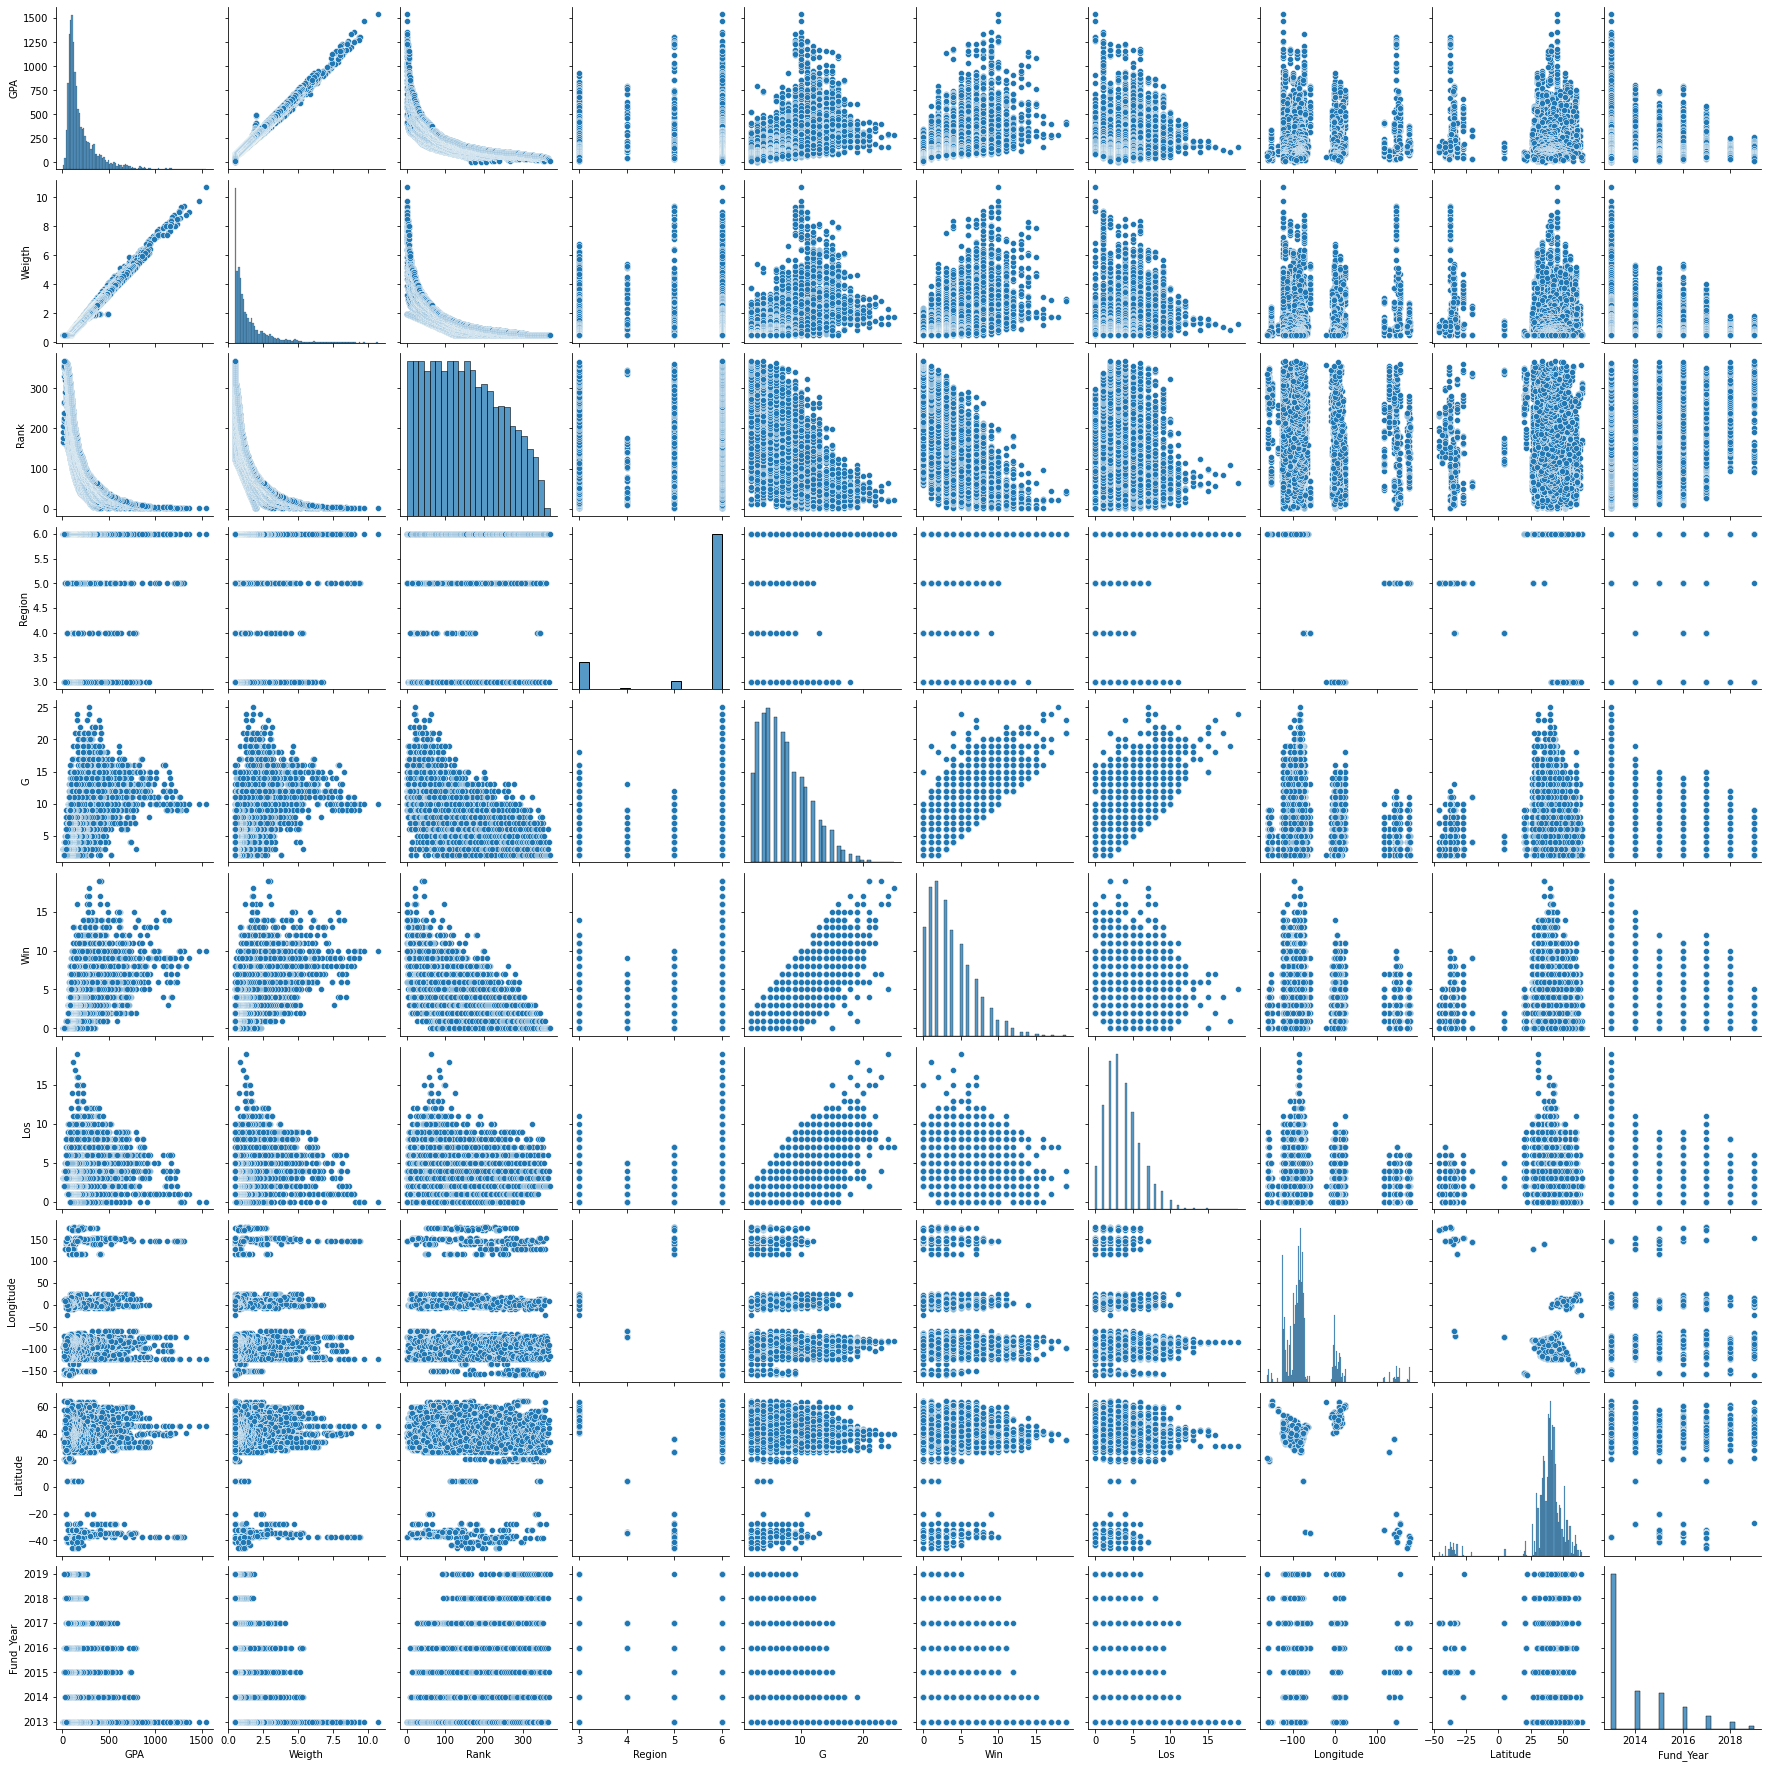

In [183]:
fig = sns.pairplot(data)
fig

In [184]:
fig.savefig("../Fig/relation_matrix.png")

In [185]:
data

GPA  \
0    484.22   
1    404.37   
2    377.71   
3    361.71   
4    334.51   
...     ...   
7732  36.87   
7733  36.79   
7734  28.24   
7735  27.80   
7736  15.37   

      Weigth  \
0       1.99   
1       1.98   
2       1.96   
3       1.95   
4       1.94   
...      ...   
7732    0.50   
7733    0.50   
7734    0.50   
7735    0.50   
7736    0.50   

      Rank  \
0        1   
1        2   
2        3   
3        4   
4        5   
...    ...   
7732   364   
7733   365   
7734   366   
7735   367   
7736   368   

                Name  \
0             Gotham   
1             Denver   
2                Oly   
3           Bay_Area   
4         Angel_City   
...              ...   
7732       Hurricane   
7733         Whidbey   
7734  Kaiserslautern   
7735     Miss_Valley   
7736   Rough_Diamond   

                      City_old  \
0        New York City, NY, US   
1               Denver, CO, US   
2              Olympia, WA, US   
3              Oakland, CA, US   
4          Los Angeles, CA, US   
...                        ...   
7732    Corpus Christi, TX, US   
7733        Oak Harbor, WA, US   
7734  Rhineland-Pfalz, Germany   
7735          LaCrosse, WI, US   
7736          Murrieta, CA, US   

      Region   G  \
0          6  16   
1          6  15   
2          6  11   
3          6  14   
4          6  17   
...      ...  ..   
7732       6   2   
7733       6   3   
7734       3   2   
7735       6   4   
7736       6   2   

      Win  Los  \
0      16    0   
1      12    3   
2      10    1   
3      11    3   
4      13    4   
...   ...  ...   
7732    0    2   
7733    0    3   
7734    0    2   
7735    0    4   
7736    0    2   

           Year  \
0    2013-06-01   
1    2013-06-01   
2    2013-06-01   
3    2013-06-01   
4    2013-06-01   
...         ...   
7732 2019-12-01   
7733 2019-12-01   
7734 2019-12-01   
7735 2019-12-01   
7736 2019-12-01   

                 City  \
0       New York City   
1              Denver   
2             Olympia   
3             Oakland   
4         Los Angeles   
...               ...   
7732   Corpus Christi   
7733       Oak Harbor   
7734  Rhineland-Pfalz   
7735         LaCrosse   
7736         Murrieta   

     CityCode  \
0          NY   
1          CO   
2          WA   
3          CA   
4          CA   
...       ...   
7732       TX   
7733       WA   
7734      NaN   
7735       WI   
7736       CA   

      Country  \
0         USA   
1         USA   
2         USA   
3         USA   
4         USA   
...       ...   
7732      USA   
7733      USA   
7734  Germany   
7735      USA   
7736      USA   

      Longitude  \
0        -74.01   
1       -104.98   
2       -122.90   
3       -122.27   
4       -118.24   
...         ...   
7732     -97.40   
7733    -122.64   
7734       7.84   
7735     -91.10   
7736    -117.19   

      Latitude  \
0        40.71   
1        39.74   
2        47.05   
3        37.80   
4        34.05   
...        ...   
7732     27.75   
7733     48.29   
7734     50.22   
7735     43.90   
7736     33.58   

      Fundation  \
0    2013-06-01   
1    2013-06-01   
2    2013-06-01   
3    2013-06-01   
4    2013-06-01   
...         ...   
7732 2018-06-01   
7733 2016-03-01   
7734 2015-03-01   
7735 2014-09-01   
7736 2019-09-01   

      Fund_Year  
0          2013  
1          2013  
2          2013  
3          2013  
4          2013  
...         ...  
7732       2018  
7733       2016  
7734       2015  
7735       2014  
7736       2019  

[7737 rows x 17 columns]

In [186]:
fig = px.scatter(data_hist, x="GPA", y="Weigth",   template="plotly_white", 
             color_discrete_map=teamcolor_dict)
fig.show()

## Fundation

In [187]:
df= data_hist.groupby(['Name','Country', 'Region', 'Fundation', "Fund_Year"]).count().sort_values(by=(["Fundation", "GPA"]), ascending=False).reset_index()
df = df.loc[(df.Fundation != "2013-06-01"),:]


In [188]:
df

Name  \
0            B.M.O.   
1              Baja   
2         Beet_City   
3          Bordeaux   
4    Coast_Assassin   
..              ...   
282      Vette_City   
283      West_Texas   
284      Greenville   
285       Roughneck   
286       Soul_City   

       Country  \
0       France   
1       Mexico   
2          USA   
3       France   
4    Australia   
..         ...   
282        USA   
283        USA   
284        USA   
285        USA   
286        USA   

           Region  \
0          Europe   
1      N. America   
2      N. America   
3          Europe   
4    Asia Pacific   
..            ...   
282    N. America   
283    N. America   
284    N. America   
285    N. America   
286    N. America   

     Fundation  \
0   2019-12-01   
1   2019-12-01   
2   2019-12-01   
3   2019-12-01   
4   2019-12-01   
..         ...   
282 2013-09-01   
283 2013-09-01   
284 2013-09-01   
285 2013-09-01   
286 2013-09-01   

     Fund_Year  \
0         2019   
1         2019   
2         2019   
3         2019   
4         2019   
..         ...   
282       2013   
283       2013   
284       2013   
285       2013   
286       2013   

     GPA  Weigth  \
0      1       1   
1      1       1   
2      1       1   
3      1       1   
4      1       1   
..   ...     ...   
282   26      26   
283   26      26   
284   23      23   
285   21      21   
286   21      21   

     Rank  \
0       1   
1       1   
2       1   
3       1   
4       1   
..    ...   
282    26   
283    26   
284    23   
285    21   
286    21   

     City_old   G  \
0           1   1   
1           1   1   
2           1   1   
3           1   1   
4           1   1   
..        ...  ..   
282        26  26   
283        26  26   
284        23  23   
285        21  21   
286        21  21   

     Win  Los  \
0      1    1   
1      1    1   
2      1    1   
3      1    1   
4      1    1   
..   ...  ...   
282   26   26   
283   26   26   
284   23   23   
285   21   21   
286   21   21   

     Year  City  \
0       1     1   
1       1     1   
2       1     1   
3       1     1   
4       1     1   
..    ...   ...   
282    26    26   
283    26    26   
284    23    23   
285    21    21   
286    21    21   

     CityCode  \
0           0   
1           0   
2           0   
3           0   
4           0   
..        ...   
282        26   
283        26   
284        23   
285        21   
286         0   

     Longitude  \
0            1   
1            1   
2            1   
3            1   
4            1   
..         ...   
282         26   
283         26   
284         23   
285         21   
286         21   

     Latitude  
0           1  
1           1  
2           1  
3           1  
4           1  
..        ...  
282        26  
283        26  
284        23  
285        21  
286        21  

[287 rows x 17 columns]

In [189]:
fund_country = df.groupby(['Country', 'Region', 'Fundation', "Fund_Year"]).count().sort_values(by=(["Fundation", "GPA"]), ascending=False).reset_index()

fund_region = df.groupby(['Region', 'Fundation', "Fund_Year"]).count().sort_values(by=(["Fundation", "GPA"]), ascending=False).reset_index()

fund_region_year = df.groupby(['Region', "Fund_Year"]).count().sort_values(by=(["Fund_Year", "GPA"]), ascending=False).reset_index()

fund_country_year = df.groupby(['Country', 'Region', "Fund_Year"]).count().sort_values(by=(["Fund_Year", "GPA"]), ascending=False).reset_index()


In [190]:
df.loc[((df.Region == "Central/S. America")),:]

Name  \
94   Sailor_City   
99   Metro_Chile   
100       Bogotá   
116        2_x_4   
251   RnR_Queens   

       Country  \
94   Argentina   
99       Chile   
100   Colombia   
116  Argentina   
251   Colombia   

                 Region  \
94   Central/S. America   
99   Central/S. America   
100  Central/S. America   
116  Central/S. America   
251  Central/S. America   

     Fundation  \
94  2017-06-01   
99  2017-06-01   
100 2017-06-01   
116 2016-09-01   
251 2014-06-01   

     Fund_Year  \
94        2017   
99        2017   
100       2017   
116       2016   
251       2014   

     GPA  Weigth  \
94    11      11   
99     6       6   
100    4       4   
116   14      14   
251   20      20   

     Rank  \
94     11   
99      6   
100     4   
116    14   
251    20   

     City_old   G  \
94         11  11   
99          6   6   
100         4   4   
116        14  14   
251        20  20   

     Win  Los  \
94    11   11   
99     6    6   
100    4    4   
116   14   14   
251   20   20   

     Year  City  \
94     11    11   
99      6     6   
100     4     4   
116    14    14   
251    20    20   

     CityCode  \
94          0   
99          0   
100         0   
116         0   
251         0   

     Longitude  \
94          11   
99           6   
100          4   
116         14   
251         20   

     Latitude  
94         11  
99          6  
100         4  
116        14  
251        20

In [191]:
fund_region_year

Region  \
0           N. America   
1               Europe   
2         Asia Pacific   
3           N. America   
4               Europe   
5           N. America   
6               Europe   
7         Asia Pacific   
8   Central/S. America   
9           N. America   
10              Europe   
11        Asia Pacific   
12  Central/S. America   
13          N. America   
14        Asia Pacific   
15              Europe   
16          N. America   
17              Europe   
18        Asia Pacific   
19  Central/S. America   
20          N. America   
21              Europe   

    Fund_Year  \
0        2019   
1        2019   
2        2019   
3        2018   
4        2018   
5        2017   
6        2017   
7        2017   
8        2017   
9        2016   
10       2016   
11       2016   
12       2016   
13       2015   
14       2015   
15       2015   
16       2014   
17       2014   
18       2014   
19       2014   
20       2013   
21       2013   

    Name  Country  \
0     20       20   
1     13       13   
2      1        1   
3     27       27   
4      4        4   
5     17       17   
6     16       16   
7      4        4   
8      3        3   
9     37       37   
10    14       14   
11     3        3   
12     1        1   
13    41       41   
14    11       11   
15     8        8   
16    38       38   
17    11       11   
18     3        3   
19     1        1   
20    13       13   
21     1        1   

    Fundation  \
0          20   
1          13   
2           1   
3          27   
4           4   
5          17   
6          16   
7           4   
8           3   
9          37   
10         14   
11          3   
12          1   
13         41   
14         11   
15          8   
16         38   
17         11   
18          3   
19          1   
20         13   
21          1   

    GPA  Weigth  \
0    20      20   
1    13      13   
2     1       1   
3    27      27   
4     4       4   
5    17      17   
6    16      16   
7     4       4   
8     3       3   
9    37      37   
10   14      14   
11    3       3   
12    1       1   
13   41      41   
14   11      11   
15    8       8   
16   38      38   
17   11      11   
18    3       3   
19    1       1   
20   13      13   
21    1       1   

    Rank  \
0     20   
1     13   
2      1   
3     27   
4      4   
5     17   
6     16   
7      4   
8      3   
9     37   
10    14   
11     3   
12     1   
13    41   
14    11   
15     8   
16    38   
17    11   
18     3   
19     1   
20    13   
21     1   

    City_old   G  \
0         20  20   
1         13  13   
2          1   1   
3         27  27   
4          4   4   
5         17  17   
6         16  16   
7          4   4   
8          3   3   
9         37  37   
10        14  14   
11         3   3   
12         1   1   
13        41  41   
14        11  11   
15         8   8   
16        38  38   
17        11  11   
18         3   3   
19         1   1   
20        13  13   
21         1   1   

    Win  Los  \
0    20   20   
1    13   13   
2     1    1   
3    27   27   
4     4    4   
5    17   17   
6    16   16   
7     4    4   
8     3    3   
9    37   37   
10   14   14   
11    3    3   
12    1    1   
13   41   41   
14   11   11   
15    8    8   
16   38   38   
17   11   11   
18    3    3   
19    1    1   
20   13   13   
21    1    1   

    Year  City  \
0     20    20   
1     13    13   
2      1     1   
3     27    27   
4      4     4   
5     17    17   
6     16    16   
7      4     4   
8      3     3   
9     37    37   
10    14    14   
11     3     3   
12     1     1   
13    41    41   
14    11    11   
15     8     8   
16    38    38   
17    11    11   
18     3     3   
19     1     1   
20    13    13   
21     1     1   

    CityCode  \
0         20   
1         13   
2          1   
3         27   
4          4   
5         17   
6         16   
7          4   
8          3   
9         37   
10        14 

### Bar and Line plot Trim with Country

In [192]:
fund = df.groupby(['Region', 'Fundation']).count().sort_values(by=(["Fundation", "GPA"]), ascending=False).reset_index()
fund

i = ["2019-09-01","2019-06-01","2019-03-01",
     "2018-12-01","2018-09-01","2018-06-01","2018-03-01",
     "2017-09-01","2017-03-01", 
     "2016-12-01","2016-03-01",
     "2015-09-01",
     "2014-09-01", "2014-03-01",
     "2013-12-01","2013-09-01"]
a = fund.copy()

for x in i:
    df2 = pd.DataFrame([["Asia Pacific",x,0]], columns=['Region','Fundation','GPA'])
    a = pd.concat([df2, a]) 


In [193]:
fund.loc[fund.Region.str.contains("Asia Pacific"), "Fundation"].unique()

array(['2019-12-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2017-06-01T00:00:00.000000000', '2016-09-01T00:00:00.000000000',
       '2016-06-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2015-06-01T00:00:00.000000000', '2015-03-01T00:00:00.000000000',
       '2014-12-01T00:00:00.000000000', '2014-06-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [194]:
i = ["2018-09-01", "2018-03-01","2015-09-01","2013-09-01"]
for x in i:
    df2 = pd.DataFrame([["Europe",x,0]], columns=['Region','Fundation','GPA'])
    a = pd.concat([df2, a]) 

In [195]:
i = ["2019-12-01","2019-09-01","2019-06-01","2019-03-01",
     "2018-12-01","2018-09-01","2018-06-01","2018-03-01",
     "2017-12-01","2017-09-01","2017-03-01", 
     "2016-12-01","2016-06-01","2016-03-01",
     "2015-12-01","2015-09-01","2015-06-01","2015-03-01",
     "2014-12-01","2014-09-01","2014-03-01",
     "2013-12-01","2013-09-01","2013-06-01"]
for x in i:
    df2 = pd.DataFrame([["Central/S. America",x,0]], columns=['Region','Fundation','GPA'])
    a = pd.concat([df2, a                  ]) 


In [196]:
a

Region  \
0   Central/S. America   
0   Central/S. America   
0   Central/S. America   
0   Central/S. America   
0   Central/S. America   
..                 ...   
56          N. America   
57              Europe   
58          N. America   
59              Europe   
60          N. America   

              Fundation  \
0            2013-06-01   
0            2013-09-01   
0            2013-12-01   
0            2014-03-01   
0            2014-09-01   
..                  ...   
56  2014-03-01 00:00:00   
57  2014-03-01 00:00:00   
58  2013-12-01 00:00:00   
59  2013-12-01 00:00:00   
60  2013-09-01 00:00:00   

    GPA  Name  \
0     0   nan   
0     0   nan   
0     0   nan   
0     0   nan   
0     0   nan   
..  ...   ...   
56   16 16.00   
57    1  1.00   
58    7  7.00   
59    1  1.00   
60    6  6.00   

    Country  \
0       nan   
0       nan   
0       nan   
0       nan   
0       nan   
..      ...   
56    16.00   
57     1.00   
58     7.00   
59     1.00   
60     6.00   

    Fund_Year  \
0         nan   
0         nan   
0         nan   
0         nan   
0         nan   
..        ...   
56      16.00   
57       1.00   
58       7.00   
59       1.00   
60       6.00   

    Weigth  Rank  \
0      nan   nan   
0      nan   nan   
0      nan   nan   
0      nan   nan   
0      nan   nan   
..     ...   ...   
56   16.00 16.00   
57    1.00  1.00   
58    7.00  7.00   
59    1.00  1.00   
60    6.00  6.00   

    City_old  \
0        nan   
0        nan   
0        nan   
0        nan   
0        nan   
..       ...   
56     16.00   
57      1.00   
58      7.00   
59      1.00   
60      6.00   

       G   Win  \
0    nan   nan   
0    nan   nan   
0    nan   nan   
0    nan   nan   
0    nan   nan   
..   ...   ...   
56 16.00 16.00   
57  1.00  1.00   
58  7.00  7.00   
59  1.00  1.00   
60  6.00  6.00   

     Los  Year  \
0    nan   nan   
0    nan   nan   
0    nan   nan   
0    nan   nan   
0    nan   nan   
..   ...   ...   
56 16.00 16.00   
57  1.00  1.00   
58  7.00  7.00   
59  1.00  1.00   
60  6.00  6.00   

    City  \
0    nan   
0    nan   
0    nan   
0    nan   
0    nan   
..   ...   
56 16.00   
57  1.00   
58  7.00   
59  1.00   
60  6.00   

    CityCode  \
0        nan   
0        nan   
0        nan   
0        nan   
0        nan   
..       ...   
56     16.00   
57      1.00   
58      7.00   
59      1.00   
60      6.00   

    Longitude  \
0         nan   
0         nan   
0         nan   
0         nan   
0         nan   
..        ...   
56      16.00   
57       1.00   
58       7.00   
59       1.00   
60       6.00   

    Latitude  
0        nan  
0        nan  
0        nan  
0        nan  
0        nan  
..       ...  
56     16.00  
57      1.00  
58      7.00  
59      1.00  
60      6.00  

[105 rows x 17 columns]

In [197]:
a.Fundation = pd.to_datetime(a.Fundation, format='%Y-%m-%d')
a["Fund_Year"]= a.Fundation.apply(lambda x: x.year)
a = a.sort_values(by=(["Fundation", "GPA"]), ascending=False).reset_index(drop=True)

In [202]:
a.drop(columns= ['Name', 'Country','Weigth', 'Rank','City_old','G', 'Win','Los','Year',
       'City','CityCode','Longitude','Latitude'], inplace= True)

In [203]:
scatter_total = a.groupby("Fund_Year").sum().reset_index()
#Change the name to identify better
scatter_total = scatter_total.iloc[:,0:2]
scatter_total.columns = ["Year_Key", "Total"]
#Merge the two datasets 
#a = pd.merge(a, scatter_total , how="inner", left_on="Year", right_on="Year_Key",)

In [204]:
scatter_total

Year_Key  Total
0      2013     14
1      2014     53
2      2015     60
3      2016     55
4      2017     40
5      2018     31
6      2019     34

In [120]:
fig = px.line(a.loc[(a.Fundation != "2013-06-01"), : ], x= 'Fundation', y='GPA', color="Region", 
              template="plotly_white", color_discrete_map=teamcolor_dict, 
              labels={'GPA':'Count', 'Fundation': 'New Members'})
fig.update_traces(mode='lines+markers')
fig.add_vrect(x0="2014-12-04", x1="2014-12-04", annotation_text="12/2014 RD World Cup <br>(Texas)")
fig.add_vrect(x0="2018-02-01", x1="2018-02-01", annotation_text="02/2018 RD World Cup <br>(Manchester)")

# Edit the layout
fig.update_layout(title='Amount of new members by month',
                   yaxis_title='Amount of new teams')



fig.update_traces(line_width=3)

fig.show()

KeyError: 'Region'

In [93]:
a.loc[(a.Fundation != "2013-06-01"), : ].groupby(['Region', "Fund_Year"]).sum().sort_values(by=(["Fund_Year", "GPA"]), ascending=False).reset_index()

Region  \
0           N. America   
1               Europe   
2         Asia Pacific   
3   Central/S. America   
4           N. America   
5               Europe   
6         Asia Pacific   
7   Central/S. America   
8           N. America   
9               Europe   
10        Asia Pacific   
11  Central/S. America   
12          N. America   
13              Europe   
14        Asia Pacific   
15  Central/S. America   
16          N. America   
17        Asia Pacific   
18              Europe   
19  Central/S. America   
20          N. America   
21              Europe   
22        Asia Pacific   
23  Central/S. America   
24          N. America   
25              Europe   
26        Asia Pacific   
27  Central/S. America   

    Fund_Year  \
0        2019   
1        2019   
2        2019   
3        2019   
4        2018   
5        2018   
6        2018   
7        2018   
8        2017   
9        2017   
10       2017   
11       2017   
12       2016   
13       2016   
14       2016   
15       2016   
16       2015   
17       2015   
18       2015   
19       2015   
20       2014   
21       2014   
22       2014   
23       2014   
24       2013   
25       2013   
26       2013   
27       2013   

    GPA  Name  \
0    20 20.00   
1    13 13.00   
2     1  1.00   
3     0  0.00   
4    27 27.00   
5     4  4.00   
6     0  0.00   
7     0  0.00   
8    17 17.00   
9    16 16.00   
10    4  4.00   
11    3  3.00   
12   37 37.00   
13   14 14.00   
14    3  3.00   
15    1  1.00   
16   41 41.00   
17   11 11.00   
18    8  8.00   
19    0  0.00   
20   38 38.00   
21   11 11.00   
22    3  3.00   
23    1  1.00   
24   13 13.00   
25    1  1.00   
26    0  0.00   
27    0  0.00   

    Country  \
0     20.00   
1     13.00   
2      1.00   
3      0.00   
4     27.00   
5      4.00   
6      0.00   
7      0.00   
8     17.00   
9     16.00   
10     4.00   
11     3.00   
12    37.00   
13    14.00   
14     3.00   
15     1.00   
16    41.00   
17    11.00   
18     8.00   
19     0.00   
20    38.00   
21    11.00   
22     3.00   
23     1.00   
24    13.00   
25     1.00   
26     0.00   
27     0.00   

    Weigth  Rank  \
0    20.00 20.00   
1    13.00 13.00   
2     1.00  1.00   
3     0.00  0.00   
4    27.00 27.00   
5     4.00  4.00   
6     0.00  0.00   
7     0.00  0.00   
8    17.00 17.00   
9    16.00 16.00   
10    4.00  4.00   
11    3.00  3.00   
12   37.00 37.00   
13   14.00 14.00   
14    3.00  3.00   
15    1.00  1.00   
16   41.00 41.00   
17   11.00 11.00   
18    8.00  8.00   
19    0.00  0.00   
20   38.00 38.00   
21   11.00 11.00   
22    3.00  3.00   
23    1.00  1.00   
24   13.00 13.00   
25    1.00  1.00   
26    0.00  0.00   
27    0.00  0.00   

    City_old  \
0      20.00   
1      13.00   
2       1.00   
3       0.00   
4      27.00   
5       4.00   
6       0.00   
7       0.00   
8      17.00   
9      16.00   
10      4.00   
11      3.00   
12     37.00   
13     14.00   
14      3.00   
15      1.00   
16     41.00   
17     11.00   
18      8.00   
19      0.00   
20     38.00   
21     11.00   
22      3.00   
23      1.00   
24     13.00   
25      1.00   
26      0.00   
27      0.00   

       G   Win  \
0  20.00 20.00   
1  13.00 13.00   
2   1.00  1.00   
3   0.00  0.00   
4  27.00 27.00   
5   4.00  4.00   
6   0.00  0.00   
7   0.00  0.00   
8  17.00 17.00   
9  16.00 16.00   
10  4.00  4.00   
11  3.00  3.00   
12 37.00 37.00   
13 14.00 14.00   
14  3.00  3.00   
15  1.00  1.00   
16 41.00 41.00   
17 11.00 11.00   
18  8.00  8.00   
19  0.00  0.00   
20 38.00 38.00   
21 11.00 11.00   
22  3.00  3.00   
23  1.00  1.00   
24 13.00 13.00   
25  1.00  1.00   
26  0.00  0.00   
27  0.00  0.00   

     Los  Year  \
0  20.00 20.00   
1  13.00 13.00   
2   1.00  1.00   
3   0.00  0.00   
4  27.00 27.00   
5   4.00  4.00   
6   0.00  0.00   
7   0.00  0.00   
8  17.00 17.00   
9  16.00 16.00   
10  4.00  4.00   
11  3.00  3.00   
12 37.00 37.00   
13 14.00 14.00  

In [104]:
fig = px.line(a.loc[(a.Fundation != "2013-06-01"), : ].groupby(['Region', "Fund_Year"]).sum().sort_values(by=(["Fund_Year","GPA"]), 
                                                                                                          ascending=False).reset_index(), x= 'Fund_Year', y='GPA', color="Region", 
              template="plotly_white", color_discrete_map=teamcolor_dict, title='Amount of new members',
              labels={'GPA':'Count', 'Fundation': 'New Members'})
fig.update_traces(mode='lines+markers')
fig.add_vrect(x0="2014.91", x1="2014.91", annotation_text="12/2014 RD World Cup <br>(Texas)")
fig.add_vrect(x0="2018", x1="2018", annotation_text="02/2018 RD World Cup <br>(Manchester)")


fig.add_trace(go.Scatter(
        x=scatter_total["Year_Key"],
        y=scatter_total["Total"],
        mode="markers+lines",
        name="Total",
        line=dict(
            color="black"
        )
    ))

fig.update_traces(line_width=3)

fig.show()

In [122]:
fig.write_image("../Fig/03-new_members.png")

In [123]:
fig = px.bar(fund_country, x= 'Fundation', y='GPA', color="Region", barmode='stack',
             template="plotly_white", color_discrete_map=teamcolor_dict, title='New members by trimestre', 
             labels={'GPA':'Count'}, hover_data = ['Country'])
fig.add_vrect(x0="2014-12-04", x1="2014-12-04", annotation_text="12/2014 RD World Cup <br>(Texas)")
fig.add_vrect(x0="2018-02-01", x1="2018-02-01", annotation_text="02/2018 RD World Cup <br>(Manchester)")
  

fig.show()

In [124]:
fig.write_html("../Fig/04-new_members_detail.html")

In [125]:
fig.add_trace(go.Scatter(
    x=a.loc[((a.Fundation != "2013-06-01") & (a.Region == "Europe")),  'Fundation' ],
    y=a.loc[((a.Fundation != "2013-06-01") & (a.Region == "Europe")), 'GPA' ],
    mode="markers+lines", name="Europe", line=dict(color="rgb(223, 226, 177)")
))

fig.add_trace(go.Scatter(
    x=a.loc[((a.Fundation != "2013-06-01") & (a.Region == "N. America")),  'Fundation' ],
    y=a.loc[((a.Fundation != "2013-06-01") & (a.Region == "N. America")), 'GPA' ],
    mode="markers+lines", name="N. America", line=dict(color="rgb(179, 226, 205)")
))

fig.add_trace(go.Scatter(
    x=a.loc[((a.Fundation != "2013-06-01") & (a.Region == "Central/S. America")),  'Fundation' ],
    y=a.loc[((a.Fundation != "2013-06-01") & (a.Region == "Central/S. America")), 'GPA' ],
    mode="markers+lines", name="Central/S. America", line=dict(color="rgb(226, 177, 199)")
))

fig.add_trace(go.Scatter(
    x=a.loc[((a.Fundation != "2013-06-01") & (a.Region == "Asia Pacific")),  'Fundation' ],
    y=a.loc[((a.Fundation != "2013-06-01") & (a.Region == "Asia Pacific")), 'GPA' ],
    mode="markers+lines", name="Asia Pacific", line=dict(color="rgb(180, 177, 226)")
))
             
          
    





In [126]:
fig.write_html("../Fig/04-new_members_more-detail.html")

### Bar plot Year 

In [127]:
fig = px.bar(fund_country_year, x= 'Fund_Year', y='GPA', color="Region", 
              template="plotly_white", color_discrete_map=teamcolor_dict, title='New members by year',
              labels={'GPA':'Count'}, hover_data=[ 'Country'])

scatter_total = fund_country_year.iloc[:,0:4].groupby("Fund_Year").sum().reset_index()
scatter_total.columns = ["Year_Key", "Total"]
fund_country_year = pd.merge(fund_country_year, scatter_total , how="inner", left_on="Fund_Year", right_on="Year_Key")

fig.add_trace(go.Scatter(
        x=scatter_total["Year_Key"],
        y=scatter_total["Total"],
        mode="markers+lines",
        name="Total",
        line=dict(
            color="black"
        )
    ))

fig.show()


In [128]:
fig.write_html("../Fig/06-new_members-year.html")

In [129]:
aa = fund_country.loc[(fund_country.Country != "USA"), :]

coso = px.bar(aa, x= 'Fundation', y='GPA', barmode='stack',color="Region",
              template="plotly_white", color_discrete_map=teamcolor_dict, title='Amount of new members without USA',
              )
coso.show()

In [130]:
coso.write_image("../Fig/04-new_members_withoutUSA.png")

In [131]:
aa.Fundation.value_counts()

2017-06-01    11
2016-06-01     7
2015-06-01     7
2016-09-01     5
2019-12-01     5
2014-06-01     5
2019-06-01     5
2017-09-01     5
2014-12-01     4
2016-12-01     4
2018-06-01     4
2017-12-01     3
2015-12-01     3
2015-03-01     3
2016-03-01     3
2014-09-01     2
2019-09-01     2
2014-03-01     2
2017-03-01     2
2013-12-01     1
2019-03-01     1
2018-09-01     1
2018-12-01     1
Name: Fundation, dtype: int64

### Map of the year of fundation

In [132]:
df.Fundation = pd.to_datetime(df.Fundation, format='%Y-%m-%d')

In [133]:
df

Name  \
0            B.M.O.   
1              Baja   
2         Beet_City   
3          Bordeaux   
4    Coast_Assassin   
..              ...   
282      Vette_City   
283      West_Texas   
284      Greenville   
285       Roughneck   
286       Soul_City   

       Country  \
0       France   
1       Mexico   
2          USA   
3       France   
4    Australia   
..         ...   
282        USA   
283        USA   
284        USA   
285        USA   
286        USA   

           Region  \
0          Europe   
1      N. America   
2      N. America   
3          Europe   
4    Asia Pacific   
..            ...   
282    N. America   
283    N. America   
284    N. America   
285    N. America   
286    N. America   

     Fundation  \
0   2019-12-01   
1   2019-12-01   
2   2019-12-01   
3   2019-12-01   
4   2019-12-01   
..         ...   
282 2013-09-01   
283 2013-09-01   
284 2013-09-01   
285 2013-09-01   
286 2013-09-01   

     Fund_Year  \
0         2019   
1         2019   
2         2019   
3         2019   
4         2019   
..         ...   
282       2013   
283       2013   
284       2013   
285       2013   
286       2013   

     GPA  Weigth  \
0      1       1   
1      1       1   
2      1       1   
3      1       1   
4      1       1   
..   ...     ...   
282   26      26   
283   26      26   
284   23      23   
285   21      21   
286   21      21   

     Rank  \
0       1   
1       1   
2       1   
3       1   
4       1   
..    ...   
282    26   
283    26   
284    23   
285    21   
286    21   

     City_old   G  \
0           1   1   
1           1   1   
2           1   1   
3           1   1   
4           1   1   
..        ...  ..   
282        26  26   
283        26  26   
284        23  23   
285        21  21   
286        21  21   

     Win  Los  \
0      1    1   
1      1    1   
2      1    1   
3      1    1   
4      1    1   
..   ...  ...   
282   26   26   
283   26   26   
284   23   23   
285   21   21   
286   21   21   

     Year  City  \
0       1     1   
1       1     1   
2       1     1   
3       1     1   
4       1     1   
..    ...   ...   
282    26    26   
283    26    26   
284    23    23   
285    21    21   
286    21    21   

     CityCode  \
0           0   
1           0   
2           0   
3           0   
4           0   
..        ...   
282        26   
283        26   
284        23   
285        21   
286         0   

     Longitude  \
0            1   
1            1   
2            1   
3            1   
4            1   
..         ...   
282         26   
283         26   
284         23   
285         21   
286         21   

     Latitude  
0           1  
1           1  
2           1  
3           1  
4           1  
..        ...  
282        26  
283        26  
284        23  
285        21  
286        21  

[287 rows x 17 columns]

In [134]:
df['Fundation'] = df.Fundation.apply(lambda x: x.date()).apply(str) # convert timestamp to a string

In [135]:
mappin = {'2013-06-01' : 90, '2013-09-01' : 90 ,'2013-12-01' : 90,
         '2014-03-01' : 75, '2014-06-01' : 75, '2014-09-01' : 75 , '2014-12-01' : 75 ,
         '2015-03-01' : 60, '2015-06-01' : 60, '2015-09-01' : 60, '2015-12-01' : 60,
         '2016-03-01' : 45, '2016-06-01' : 45, '2016-09-01' : 45, '2016-12-01' : 45, 
         '2017-03-01' : 30, '2017-06-01' : 30, '2017-09-01' : 30, '2017-12-01' : 30,
         '2018-03-01' : 15 ,'2018-06-01' : 15, '2018-09-01' : 15,  '2018-12-01' : 15,
         '2019-03-01' : 1, '2019-06-01' : 1, '2019-09-01' : 1, '2019-12-01' : 1   
         }
df['Size'] = df['Fundation'].map(mappin) 

In [136]:
# Create base map
mapa1 = folium.Map(location = [-9.488560, -18.826032],
                 zoom_start = 1.5, 
                 tiles = "CartoDB positron") # Sets Tile Theme to (Dark Theme)

mc = MarkerCluster()
for index, row in df.iterrows():
    mc.add_child(folium.Marker(location=[str(row['Latitude']),     str(row['Longitude'])], tooltip= str(row['Name'] + " in the ranking since  "+ row['Fundation']),
                               icon=folium.Icon(color="darkpurple", icon="star",      clustered_marker=True)))
    folium.Circle(location=[str(row['Latitude']), str(row['Longitude'])], color='pink', fill=False,  radius=int(row['Size'])*900).add_to(mapa1)
mapa1.add_child(mc)
mapa1.save('../Fig/05-foundation_map.html') # Saves Map to an HTML File

## Region

## Country

In [43]:
country = data_hist.groupby(['Country', 'Region', 'Year']).count().sort_values(by=(["Year", "GPA"]), ascending=True).reset_index()
country

Country  \
0         Australia   
1           Belgium   
2           Finland   
3           Germany   
4          Scotland   
..              ...   
482       Australia   
483          France   
484  United Kingdom   
485          Canada   
486             USA   

           Region  \
0    Asia Pacific   
1          Europe   
2          Europe   
3          Europe   
4          Europe   
..            ...   
482  Asia Pacific   
483        Europe   
484        Europe   
485    N. America   
486    N. America   

          Year  \
0   2013-06-01   
1   2013-06-01   
2   2013-06-01   
3   2013-06-01   
4   2013-06-01   
..         ...   
482 2019-12-01   
483 2019-12-01   
484 2019-12-01   
485 2019-12-01   
486 2019-12-01   

     GPA  Weigth  \
0      1       1   
1      1       1   
2      1       1   
3      1       1   
4      2       2   
..   ...     ...   
482   11      11   
483   11      11   
484   19      19   
485   23      23   
486  254     254   

     Rank  Name  \
0       1     1   
1       1     1   
2       1     1   
3       1     1   
4       2     2   
..    ...   ...   
482    11    11   
483    11    11   
484    19    19   
485    23    23   
486   254   254   

     City_old  \
0           1   
1           1   
2           1   
3           1   
4           2   
..        ...   
482        11   
483        11   
484        19   
485        23   
486       254   

       G  Win  \
0      1    1   
1      1    1   
2      1    1   
3      1    1   
4      2    2   
..   ...  ...   
482   11   11   
483   11   11   
484   19   19   
485   23   23   
486  254  254   

     Los  City  \
0      1     1   
1      1     1   
2      1     1   
3      1     1   
4      2     2   
..   ...   ...   
482   11    11   
483   11    11   
484   19    19   
485   23    23   
486  254   254   

     CityCode  \
0           0   
1           0   
2           0   
3           0   
4           0   
..        ...   
482         2   
483         0   
484         0   
485        22   
486       245   

     Longitude  \
0            1   
1            1   
2            1   
3            1   
4            2   
..         ...   
482         11   
483         11   
484         19   
485         23   
486        254   

     Latitude  
0           1  
1           1  
2           1  
3           1  
4           2  
..        ...  
482        11  
483        11  
484        19  
485        23  
486       254  

[487 rows x 15 columns]

In [44]:
print(country.loc[(country.Year == "2019-12-01"), "Country"].nunique())
print(country.loc[(country.Year == "2019-12-01"), "Country"].unique())

23
['Austria' 'Iceland' 'Italy' 'Japan' 'Mexico' 'Norway' 'Switzerland'
 'Argentina' 'Denmark' 'Ireland' 'Spain' 'Scotland' 'Belgium' 'Finland'
 'Netherlands' 'New Zealand' 'Sweden' 'Germany' 'Australia' 'France'
 'United Kingdom' 'Canada' 'USA']


In [46]:
print(country.loc[(country.GPA >= 2) & (country.Year == "2019-12-01"), "Country"].nunique())
print(country.loc[(country.GPA >= 2) & (country.Year == "2019-12-01"), "Country"].unique())

16
['Argentina' 'Denmark' 'Ireland' 'Spain' 'Scotland' 'Belgium' 'Finland'
 'Netherlands' 'New Zealand' 'Sweden' 'Germany' 'Australia' 'France'
 'United Kingdom' 'Canada' 'USA']


In [140]:
print(country.loc[(country.Year == "2013-12-01"), "Country"].nunique())

9


In [47]:
print(country.loc[(country.GPA >= 2) & (country.Year == "2013-12-01"), "Country"].unique())
print(country.loc[(country.GPA >= 2) & (country.Year == "2013-12-01"), "Country"].nunique())

['Scotland' 'Sweden' 'Canada' 'United Kingdom' 'USA']
5


In [142]:
country['Year'] = country.Year.apply(lambda x: x.date()).apply(str) # convert timestamp to a string

In [143]:
fig = px.bar(country, x= 'Country', y='GPA', color="Region", animation_frame="Year", 
             range_x=([0, 16]),
             template="plotly_white", color_discrete_map=teamcolor_dict, title='Countries with 2 or more Teams',
             labels={'GPA':'The Countries'}).update_xaxes(categoryorder="sum descending")
fig.show()

In [144]:
fig.write_html("../Fig/10-Race_Country.html")

In [145]:
fig = px.sunburst(country[country.Year == "2013-06-01"], path=['Region', 'Country'], values='GPA',
                  color='Region')
fig.show()
fig.write_html("../Fig/025_Sunburst2013.html")

In [146]:
fig = px.sunburst(country[country.Year == "2019-12-01"], path=['Region', 'Country'], values='GPA',                  color='Region')
fig.show()
fig.write_html("../Fig/025_Sunburst2019.html")

### Map Country evolution

In [147]:
data_hist["count"]= 1
df_month_list = []
for year in data_hist.Year.sort_values().unique():
    df_month_list.append(data_hist.loc[data_hist.Year == year, ['Latitude', 'Longitude', 'count']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist())
    

mapa_hist = generateBaseMap(default_zoom_start=2)
HeatMapWithTime(df_month_list, radius=10, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(mapa_hist)
mapa_hist

In [148]:
mapa_hist.save("../Fig/02-HIST_TEAM.html")

## City 

In [149]:
data["City"].value_counts()

London        74
Birmingham    68
Melbourne     64
Portland      54
Denver        54
              ..
Swansea        1
Best           1
Bordeaux       1
Nampa          1
Sannois        1
Name: City, Length: 398, dtype: int64

In [150]:
# I have a few cities repeat a lot more than the most frecuent in City_old column 
#Denver, CO, US (54) vs London (74) / Birmingham (68) / Melbourne (64)

print(data_hist.loc[(data_hist.City == "London"), "City_old"].unique())
print(data_hist.loc[(data_hist.City == "Birmingham"), "City_old"].unique())
print(data_hist.loc[(data_hist.City == "Melbourne"), "City_old"].unique())

['London, England' 'London, ON, Canada']
['Birmingham, England' 'Birmingham, AL, US']
['Melbourne, VIC, Australia' 'Melbourne, FL, US']


In [151]:
city = data_hist.groupby(['City_old', 'Region', 'Year']).count().sort_values(by=((["Year"])), ascending=False).reset_index()
city

City_old  \
0        Zurich, Switzerland   
1            Hammond, IN, US   
2         Pittsburgh, PA, US   
3             Athens, GA, US   
4     Hazlet, New Jersey, US   
...                      ...   
7204           Ogden, UT, US   
7205           Boise, ID, US   
7206       Glasgow, Scotland   
7207     Baton Rouge, LA, US   
7208       Centralia, WA, US   

          Region  \
0         Europe   
1     N. America   
2     N. America   
3     N. America   
4     N. America   
...          ...   
7204  N. America   
7205  N. America   
7206      Europe   
7207  N. America   
7208  N. America   

           Year  \
0    2019-12-01   
1    2019-12-01   
2    2019-12-01   
3    2019-12-01   
4    2019-12-01   
...         ...   
7204 2013-06-01   
7205 2013-06-01   
7206 2013-06-01   
7207 2013-06-01   
7208 2013-06-01   

      GPA  Weigth  \
0       1       1   
1       1       1   
2       1       1   
3       1       1   
4       1       1   
...   ...     ...   
7204    1       1   
7205    1       1   
7206    1       1   
7207    1       1   
7208    1       1   

      Rank  Name  \
0        1     1   
1        1     1   
2        1     1   
3        1     1   
4        1     1   
...    ...   ...   
7204     1     1   
7205     1     1   
7206     1     1   
7207     1     1   
7208     1     1   

      G  Win  Los  \
0     1    1    1   
1     1    1    1   
2     1    1    1   
3     1    1    1   
4     1    1    1   
...  ..  ...  ...   
7204  1    1    1   
7205  1    1    1   
7206  1    1    1   
7207  1    1    1   
7208  1    1    1   

      City  \
0        1   
1        1   
2        1   
3        1   
4        1   
...    ...   
7204     1   
7205     1   
7206     1   
7207     1   
7208     1   

      CityCode  \
0            0   
1            1   
2            1   
3            1   
4            0   
...        ...   
7204         1   
7205         1   
7206         0   
7207         1   
7208         1   

      Country  \
0           1   
1           1   
2           1   
3           1   
4           1   
...       ...   
7204        1   
7205        1   
7206        1   
7207        1   
7208        1   

      Longitude  \
0             1   
1             1   
2             1   
3             1   
4             1   
...         ...   
7204          1   
7205          1   
7206          1   
7207          1   
7208          1   

      Latitude  \
0            1   
1            1   
2            1   
3            1   
4            1   
...        ...   
7204         1   
7205         1   
7206         1   
7207         1   
7208         1   

      Fundation  \
0             1   
1             1   
2             1   
3             1   
4             1   
...         ...   
7204          1   
7205          1   
7206          1   
7207          1   
7208          1   

      Fund_Year  \
0             1   
1             1   
2             1   
3             1   
4             1   
...         ...   
7204          1   
7205          1   
7206          1   
7207          1   
7208          1   

      count  
0         1  
1         1  
2         1  
3         1  
4         1  
...     ...  
7204      1  
7205      1  
7206      1  
7207      1  
7208      1  

[7209 rows x 18 columns]

In [152]:
city.loc[(city.GPA > 1), "City_old"].unique()

array(['Helsinki, Finland', 'Indianapolis, IN, US', 'Houston, TX, US',
       'Paris, France', 'Philadelphia, PA, US', 'San Diego, CA, US',
       'Richmond, VA, US', 'Gothenburg, Sweden',
       'Melbourne, VIC, Australia', 'London, England', 'Chicago, IL, US',
       'Toronto, ON, Canada', 'Denver, CO, US', 'Columbia, SC, US',
       'Ventura, CA, US', 'Dallas, TX, US', 'Birmingham, England',
       'St. Louis, MO, US', 'Buenos Aires, Argentina',
       'Stockholm, Sweden', 'Vancouver, BC, Canada', 'Morristown, NJ, US',
       'San Jose, CA, US', 'Seattle, WA, US', 'Bakersfield, CA, US',
       'Okinawa, Japan', 'Auckland, New Zealand', 'Ottawa, ON, Canada',
       'Sacramento, CA, US', 'Oklahoma City, OK, US', 'Beckley, WV, US',
       'Des Moines, IA, US', 'Appleton, WI, US', 'Fort Collins, CO, US'],
      dtype=object)

In [153]:
fig = px.bar(city.loc[((city.GPA > 1) & (city.Year == "2019-12-01")), :], x= 'City_old', y='GPA', color="Region", 
             template="plotly_white", color_discrete_map=teamcolor_dict, title='Citys with more than 1 team -Dec/2019-',
             labels={'City_old':'City', 'GPA':'Count'}).update_xaxes(categoryorder="total descending")
fig.show()


In [154]:
fig.write_image("../Fig/Citys_Dec-2019.png")


In [155]:
fig = px.bar(city.loc[((city.GPA > 1) & (city.Year == "2016-09-01")), :], x= 'City_old', y='GPA', color="Region", 
             template="plotly_white", color_discrete_map=teamcolor_dict, title='Citys with more than 1 team -Sep/2016-', 
             labels={'City_old':'City', 'GPA':'Count'}).update_xaxes(categoryorder="total descending")
fig.show()


In [156]:
fig.write_image("../Fig/Citys_Sep-2016.png")


In [157]:
fig = px.bar(city.loc[((city.GPA > 1) & (city.Year == city.Year.min())), :], x= 'City_old', y='GPA', color="Region", 
             template="plotly_white", color_discrete_map=teamcolor_dict, title='Citys with more than 1 team -Jun/2013-', 
             labels={'City_old':'City', 'GPA':'Count'}).update_xaxes(categoryorder="total descending")
fig.show()

In [158]:
fig.write_image("../Fig/Citys_Jun-2013.png")


##  Rank

In [159]:
rank = data_hist.loc[(data_hist.Rank < 51), :].sort_values(by=(["Year", "Weigth"]), ascending=True).reset_index(drop= True)
rank

GPA  \
0     171.80   
1     177.68   
2     179.15   
3     181.00   
4     181.51   
...      ...   
1345 1154.97   
1346 1158.81   
1347 1171.56   
1348 1228.65   
1349 1540.36   

      Weigth  \
0       1.40   
1       1.41   
2       1.42   
3       1.43   
4       1.45   
...      ...   
1345    8.01   
1346    8.04   
1347    8.13   
1348    8.52   
1349   10.68   

      Rank  \
0       50   
1       49   
2       48   
3       47   
4       46   
...    ...   
1345     5   
1346     4   
1347     3   
1348     2   
1349     1   

            Name  \
0       Carolina   
1             DC   
2     Blue_Ridge   
3       Mid_Iowa   
4      Kalamazoo   
...          ...   
1345      Gotham   
1346  Arch_Rival   
1347      Denver   
1348    Victoria   
1349   Rose_City   

                       City_old  \
0               Raleigh, NC, US   
1            Washington, DC, US   
2             Asheville, NC, US   
3            Des Moines, IA, US   
4             Kalamazoo, MI, US   
...                         ...   
1345      New York City, NY, US   
1346          St. Louis, MO, US   
1347             Denver, CO, US   
1348  Melbourne, VIC, Australia   
1349           Portland, OR, US   

            Region  \
0       N. America   
1       N. America   
2       N. America   
3       N. America   
4       N. America   
...            ...   
1345    N. America   
1346    N. America   
1347    N. America   
1348  Asia Pacific   
1349    N. America   

       G  Win  \
0     13    3   
1     19    7   
2     14    6   
3      2    2   
4     18   11   
...   ..  ...   
1345  12    9   
1346  10    6   
1347  13    8   
1348  10    6   
1349  10   10   

      Los  \
0      10   
1      12   
2       8   
3       0   
4       7   
...   ...   
1345    3   
1346    4   
1347    5   
1348    4   
1349    0   

           Year  \
0    2013-06-01   
1    2013-06-01   
2    2013-06-01   
3    2013-06-01   
4    2013-06-01   
...         ...   
1345 2019-12-01   
1346 2019-12-01   
1347 2019-12-01   
1348 2019-12-01   
1349 2019-12-01   

               City  \
0           Raleigh   
1        Washington   
2         Asheville   
3        Des Moines   
4         Kalamazoo   
...             ...   
1345  New York City   
1346      St. Louis   
1347         Denver   
1348      Melbourne   
1349       Portland   

     CityCode  \
0          NC   
1          DC   
2          NC   
3          IA   
4          MI   
...       ...   
1345       NY   
1346       MO   
1347       CO   
1348      NaN   
1349       OR   

        Country  \
0           USA   
1           USA   
2           USA   
3           USA   
4           USA   
...         ...   
1345        USA   
1346        USA   
1347        USA   
1348  Australia   
1349        USA   

      Longitude  \
0        -78.64   
1        -77.04   
2        -82.55   
3        -93.60   
4        -85.59   
...         ...   
1345     -74.01   
1346     -90.24   
1347    -104.98   
1348     144.96   
1349    -122.67   

      Latitude  \
0        35.78   
1        38.89   
2        35.60   
3        41.59   
4        42.29   
...        ...   
1345     40.71   
1346     38.65   
1347     39.74   
1348    -37.81   
1349     45.52   

      Fundation  \
0    2013-06-01   
1    2013-06-01   
2    2013-06-01   
3    2013-06-01   
4    2013-06-01   
...         ...   
1345 2013-06-01   
1346 2013-06-01   
1347 2013-06-01   
1348 2013-06-01   
1349 2013-06-01   

      Fund_Year  \
0          2013   
1          2013   
2          2013   
3          2013   
4          2013   
...         ...   
1345       2013   
1346       2013   
1347       2013   
1348       2013   
1349       2013   

      count  
0         1  
1         1  
2         1  
3         1  
4         1  
...     ...  
1345      1  
1346      1  
1347      1  
1348      1  
1349      1  

[1350 rows x 18 columns]

In [160]:
aba = rank.loc[rank.Rank <26, :]
aba = aba.groupby(['Year', 'Region', ]).count().sort_values(by=(["Year"]), ascending=False).reset_index()
aba
dic = []
for i in aba.index:
    a = aba.iloc[i, 2]*100/25
    dic.append("{:.2f}".format(a))
dic

aba["Percentage"] = dic

fig = px.bar(aba, x="Year", y="GPA",color="Region", 
              template="plotly_white", color_discrete_map=teamcolor_dict, title='Teams in the top 25',
              labels={'GPA':'Count'}, hover_data= ['Percentage'],text=aba['GPA'])




fig.show()


In [161]:
fig.write_image("../Fig/08-Top25.png")

In [162]:
i = ["2019-12-01","2019-09-01","2019-06-01","2019-03-01",
     "2018-12-01","2018-09-01","2018-06-01","2018-03-01",
     "2017-12-01","2017-09-01","2017-06-01","2017-03-01",
     "2016-12-01","2016-09-01","2016-06-01","2016-03-01",
     "2015-12-01","2015-09-01","2015-06-01","2015-03-01",
     "2014-12-01","2014-09-01","2014-06-01","2014-03-01",
     "2013-12-01","2013-09-01","2013-06-01"]
for x in i:
    df2 = pd.DataFrame([["Central/S. America",51,0, x]], columns=['Region','Rank','GPA', 'Year'])
    rank = pd.concat([df2, rank]) 

In [163]:
rank

Region  \
0     Central/S. America   
0     Central/S. America   
0     Central/S. America   
0     Central/S. America   
0     Central/S. America   
...                  ...   
1345          N. America   
1346          N. America   
1347          N. America   
1348        Asia Pacific   
1349          N. America   

      Rank  \
0       51   
0       51   
0       51   
0       51   
0       51   
...    ...   
1345     5   
1346     4   
1347     3   
1348     2   
1349     1   

         GPA  \
0       0.00   
0       0.00   
0       0.00   
0       0.00   
0       0.00   
...      ...   
1345 1154.97   
1346 1158.81   
1347 1171.56   
1348 1228.65   
1349 1540.36   

                     Year  \
0              2013-06-01   
0              2013-09-01   
0              2013-12-01   
0              2014-03-01   
0              2014-06-01   
...                   ...   
1345  2019-12-01 00:00:00   
1346  2019-12-01 00:00:00   
1347  2019-12-01 00:00:00   
1348  2019-12-01 00:00:00   
1349  2019-12-01 00:00:00   

      Weigth  \
0        nan   
0        nan   
0        nan   
0        nan   
0        nan   
...      ...   
1345    8.01   
1346    8.04   
1347    8.13   
1348    8.52   
1349   10.68   

            Name  \
0            NaN   
0            NaN   
0            NaN   
0            NaN   
0            NaN   
...          ...   
1345      Gotham   
1346  Arch_Rival   
1347      Denver   
1348    Victoria   
1349   Rose_City   

                       City_old  \
0                           NaN   
0                           NaN   
0                           NaN   
0                           NaN   
0                           NaN   
...                         ...   
1345      New York City, NY, US   
1346          St. Louis, MO, US   
1347             Denver, CO, US   
1348  Melbourne, VIC, Australia   
1349           Portland, OR, US   

         G   Win  \
0      nan   nan   
0      nan   nan   
0      nan   nan   
0      nan   nan   
0      nan   nan   
...    ...   ...   
1345 12.00  9.00   
1346 10.00  6.00   
1347 13.00  8.00   
1348 10.00  6.00   
1349 10.00 10.00   

      Los  \
0     nan   
0     nan   
0     nan   
0     nan   
0     nan   
...   ...   
1345 3.00   
1346 4.00   
1347 5.00   
1348 4.00   
1349 0.00   

               City  \
0               NaN   
0               NaN   
0               NaN   
0               NaN   
0               NaN   
...             ...   
1345  New York City   
1346      St. Louis   
1347         Denver   
1348      Melbourne   
1349       Portland   

     CityCode  \
0         NaN   
0         NaN   
0         NaN   
0         NaN   
0         NaN   
...       ...   
1345       NY   
1346       MO   
1347       CO   
1348      NaN   
1349       OR   

        Country  \
0           NaN   
0           NaN   
0           NaN   
0           NaN   
0           NaN   
...         ...   
1345        USA   
1346        USA   
1347        USA   
1348  Australia   
1349        USA   

      Longitude  \
0           nan   
0           nan   
0           nan   
0           nan   
0           nan   
...         ...   
1345     -74.01   
1346     -90.24   
1347    -104.98   
1348     144.96   
1349    -122.67   

      Latitude  \
0          nan   
0          nan   
0          nan   
0          nan   
0          nan   
...        ...   
1345     40.71   
1346     38.65   
1347     39.74   
1348    -37.81   
1349     45.52   

      Fundation  \
0           NaT   
0           NaT   
0           NaT   
0           NaT   
0           NaT   
...         ...   
1345 2013-06-01   
1346 2013-06-01   
1347 2013-06-01   
1348 2013-06-01   
1349 2013-06-01   

      Fund_Year  \
0           nan   
0           nan   
0           nan   
0           nan   
0           nan   
...         ...   
1345    2013.00   
1346    2013.00   
1347    2013.00   
1348    2013.00   
1349    2013.00   

      count  
0       nan  
0       nan  
0       nan  
0       nan  
0       nan  
...     ...  
1345

In [164]:
rank = rank.sort_values(by=(["Year", "Weigth"]), ascending=True).reset_index(drop= True)

In [165]:
rank.Year = pd.to_datetime(rank.Year, format='%Y-%m-%d')

In [166]:
rank['Year'] = rank.Year.apply(lambda x: x.date()).apply(str) # convert timestamp to a string

In [167]:
rank

Region  \
0             N. America   
1             N. America   
2             N. America   
3             N. America   
4             N. America   
...                  ...   
1372  Central/S. America   
1373  Central/S. America   
1374  Central/S. America   
1375  Central/S. America   
1376  Central/S. America   

      Rank    GPA  \
0       50 171.80   
1       49 177.68   
2       48 179.15   
3       47 181.00   
4       46 181.51   
...    ...    ...   
1372    51   0.00   
1373    51   0.00   
1374    51   0.00   
1375    51   0.00   
1376    51   0.00   

            Year  \
0     2013-06-01   
1     2013-06-01   
2     2013-06-01   
3     2013-06-01   
4     2013-06-01   
...          ...   
1372  2018-12-01   
1373  2019-03-01   
1374  2019-06-01   
1375  2019-09-01   
1376  2019-12-01   

      Weigth  \
0       1.40   
1       1.41   
2       1.42   
3       1.43   
4       1.45   
...      ...   
1372     nan   
1373     nan   
1374     nan   
1375     nan   
1376     nan   

            Name  \
0       Carolina   
1             DC   
2     Blue_Ridge   
3       Mid_Iowa   
4      Kalamazoo   
...          ...   
1372         NaN   
1373         NaN   
1374         NaN   
1375         NaN   
1376         NaN   

                City_old  \
0        Raleigh, NC, US   
1     Washington, DC, US   
2      Asheville, NC, US   
3     Des Moines, IA, US   
4      Kalamazoo, MI, US   
...                  ...   
1372                 NaN   
1373                 NaN   
1374                 NaN   
1375                 NaN   
1376                 NaN   

         G   Win  \
0    13.00  3.00   
1    19.00  7.00   
2    14.00  6.00   
3     2.00  2.00   
4    18.00 11.00   
...    ...   ...   
1372   nan   nan   
1373   nan   nan   
1374   nan   nan   
1375   nan   nan   
1376   nan   nan   

       Los  \
0    10.00   
1    12.00   
2     8.00   
3     0.00   
4     7.00   
...    ...   
1372   nan   
1373   nan   
1374   nan   
1375   nan   
1376   nan   

            City  \
0        Raleigh   
1     Washington   
2      Asheville   
3     Des Moines   
4      Kalamazoo   
...          ...   
1372         NaN   
1373         NaN   
1374         NaN   
1375         NaN   
1376         NaN   

     CityCode  \
0          NC   
1          DC   
2          NC   
3          IA   
4          MI   
...       ...   
1372      NaN   
1373      NaN   
1374      NaN   
1375      NaN   
1376      NaN   

     Country  \
0        USA   
1        USA   
2        USA   
3        USA   
4        USA   
...      ...   
1372     NaN   
1373     NaN   
1374     NaN   
1375     NaN   
1376     NaN   

      Longitude  \
0        -78.64   
1        -77.04   
2        -82.55   
3        -93.60   
4        -85.59   
...         ...   
1372        nan   
1373        nan   
1374        nan   
1375        nan   
1376        nan   

      Latitude  \
0        35.78   
1        38.89   
2        35.60   
3        41.59   
4        42.29   
...        ...   
1372       nan   
1373       nan   
1374       nan   
1375       nan   
1376       nan   

      Fundation  \
0    2013-06-01   
1    2013-06-01   
2    2013-06-01   
3    2013-06-01   
4    2013-06-01   
...         ...   
1372        NaT   
1373        NaT   
1374        NaT   
1375        NaT   
1376        NaT   

      Fund_Year  \
0       2013.00   
1       2013.00   
2       2013.00   
3       2013.00   
4       2013.00   
...         ...   
1372        nan   
1373        nan   
1374        nan   
1375        nan   
1376        nan   

      count  
0      1.00  
1      1.00  
2      1.00  
3      1.00  
4      1.00  
...     ...  
1372    nan  
1373    nan  
1374    nan  
1375    nan  
1376    nan  

[1377 rows x 18 columns]

In [168]:
fig = px.bar(rank,
             y="Rank",
             x="GPA",
             animation_frame="Year",
             orientation='h',
             range_x=([0, data_hist.GPA.max()]),
             text  = "Name",
             color="Region", 
             color_discrete_map=teamcolor_dict)
# improve aesthetics (size, grids etc.)
fig.update_layout(width=1000,
                  height=800,
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  title_text='Evolution of Ranking by Region',
                  showlegend=True)
#fig.update_layout(transition={'duration': 3000, 'easing': 'cubic-in-out'})

fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='RANK')
fig.show()


In [169]:
fig.write_html("../Fig/10-Race_Rank.html")

In [170]:
data_hist

GPA  \
0    484.22   
1    404.37   
2    377.71   
3    361.71   
4    334.51   
...     ...   
7732  36.87   
7733  36.79   
7734  28.24   
7735  27.80   
7736  15.37   

      Weigth  \
0       1.99   
1       1.98   
2       1.96   
3       1.95   
4       1.94   
...      ...   
7732    0.50   
7733    0.50   
7734    0.50   
7735    0.50   
7736    0.50   

      Rank  \
0        1   
1        2   
2        3   
3        4   
4        5   
...    ...   
7732   364   
7733   365   
7734   366   
7735   367   
7736   368   

                Name  \
0             Gotham   
1             Denver   
2                Oly   
3           Bay_Area   
4         Angel_City   
...              ...   
7732       Hurricane   
7733         Whidbey   
7734  Kaiserslautern   
7735     Miss_Valley   
7736   Rough_Diamond   

                      City_old  \
0        New York City, NY, US   
1               Denver, CO, US   
2              Olympia, WA, US   
3              Oakland, CA, US   
4          Los Angeles, CA, US   
...                        ...   
7732    Corpus Christi, TX, US   
7733        Oak Harbor, WA, US   
7734  Rhineland-Pfalz, Germany   
7735          LaCrosse, WI, US   
7736          Murrieta, CA, US   

          Region  \
0     N. America   
1     N. America   
2     N. America   
3     N. America   
4     N. America   
...          ...   
7732  N. America   
7733  N. America   
7734      Europe   
7735  N. America   
7736  N. America   

       G  Win  \
0     16   16   
1     15   12   
2     11   10   
3     14   11   
4     17   13   
...   ..  ...   
7732   2    0   
7733   3    0   
7734   2    0   
7735   4    0   
7736   2    0   

      Los  \
0       0   
1       3   
2       1   
3       3   
4       4   
...   ...   
7732    2   
7733    3   
7734    2   
7735    4   
7736    2   

           Year  \
0    2013-06-01   
1    2013-06-01   
2    2013-06-01   
3    2013-06-01   
4    2013-06-01   
...         ...   
7732 2019-12-01   
7733 2019-12-01   
7734 2019-12-01   
7735 2019-12-01   
7736 2019-12-01   

                 City  \
0       New York City   
1              Denver   
2             Olympia   
3             Oakland   
4         Los Angeles   
...               ...   
7732   Corpus Christi   
7733       Oak Harbor   
7734  Rhineland-Pfalz   
7735         LaCrosse   
7736         Murrieta   

     CityCode  \
0          NY   
1          CO   
2          WA   
3          CA   
4          CA   
...       ...   
7732       TX   
7733       WA   
7734      NaN   
7735       WI   
7736       CA   

      Country  \
0         USA   
1         USA   
2         USA   
3         USA   
4         USA   
...       ...   
7732      USA   
7733      USA   
7734  Germany   
7735      USA   
7736      USA   

      Longitude  \
0        -74.01   
1       -104.98   
2       -122.90   
3       -122.27   
4       -118.24   
...         ...   
7732     -97.40   
7733    -122.64   
7734       7.84   
7735     -91.10   
7736    -117.19   

      Latitude  \
0        40.71   
1        39.74   
2        47.05   
3        37.80   
4        34.05   
...        ...   
7732     27.75   
7733     48.29   
7734     50.22   
7735     43.90   
7736     33.58   

      Fundation  \
0    2013-06-01   
1    2013-06-01   
2    2013-06-01   
3    2013-06-01   
4    2013-06-01   
...         ...   
7732 2018-06-01   
7733 2016-03-01   
7734 2015-03-01   
7735 2014-09-01   
7736 2019-09-01   

      Fund_Year  \
0          2013   
1          2013   
2          2013   
3          2013   
4          2013   
...         ...   
7732       2018   
7733       2016   
7734       2015   
7735       2014   
7736       2019   

      count  
0         1  
1         1  
2         1  
3         1  
4         1  
...     ...  
7732      1  
7733      1  
7734      1  
7735      1  
7736      1  

[7737 rows x 18 columns]

## Games Played

In [172]:
data_hist['Year'] = data_hist.Year.apply(lambda x: x.date()).apply(str) # convert timestamp to a string

In [173]:
fig = px.histogram(data_hist.loc[data_hist.Year.str.contains("-12-")], x="G",color="Region", animation_frame="Year",
                   template="plotly_white", color_discrete_map=teamcolor_dict, title='Games Played The last Year',
                   range_y = [0,55], range_x = [0,25],nbins=25,
                   labels={'G':'Games played the last season',})




fig.show()

In [174]:
fig.write_html("../Fig/amountofgames.html")

In [175]:
data_hist[data_hist.G > 7].Region.value_counts()

N. America            2828
Europe                 372
Asia Pacific            76
Central/S. America       8
Name: Region, dtype: int64

In [176]:
dic_Win = []

for a in data_hist.index:
    if data_hist.Win[a]>0:
        lon = data_hist.Win[a]*100/data_hist.G[a]
    else:
        lon = 0
    dic_Win.append(lon)

In [177]:
data_hist["Winningper"]=  dic_Win

In [178]:
data_hist

GPA  \
0    484.22   
1    404.37   
2    377.71   
3    361.71   
4    334.51   
...     ...   
7732  36.87   
7733  36.79   
7734  28.24   
7735  27.80   
7736  15.37   

      Weigth  \
0       1.99   
1       1.98   
2       1.96   
3       1.95   
4       1.94   
...      ...   
7732    0.50   
7733    0.50   
7734    0.50   
7735    0.50   
7736    0.50   

      Rank  \
0        1   
1        2   
2        3   
3        4   
4        5   
...    ...   
7732   364   
7733   365   
7734   366   
7735   367   
7736   368   

                Name  \
0             Gotham   
1             Denver   
2                Oly   
3           Bay_Area   
4         Angel_City   
...              ...   
7732       Hurricane   
7733         Whidbey   
7734  Kaiserslautern   
7735     Miss_Valley   
7736   Rough_Diamond   

                      City_old  \
0        New York City, NY, US   
1               Denver, CO, US   
2              Olympia, WA, US   
3              Oakland, CA, US   
4          Los Angeles, CA, US   
...                        ...   
7732    Corpus Christi, TX, US   
7733        Oak Harbor, WA, US   
7734  Rhineland-Pfalz, Germany   
7735          LaCrosse, WI, US   
7736          Murrieta, CA, US   

          Region  \
0     N. America   
1     N. America   
2     N. America   
3     N. America   
4     N. America   
...          ...   
7732  N. America   
7733  N. America   
7734      Europe   
7735  N. America   
7736  N. America   

       G  Win  \
0     16   16   
1     15   12   
2     11   10   
3     14   11   
4     17   13   
...   ..  ...   
7732   2    0   
7733   3    0   
7734   2    0   
7735   4    0   
7736   2    0   

      Los  \
0       0   
1       3   
2       1   
3       3   
4       4   
...   ...   
7732    2   
7733    3   
7734    2   
7735    4   
7736    2   

            Year  \
0     2013-06-01   
1     2013-06-01   
2     2013-06-01   
3     2013-06-01   
4     2013-06-01   
...          ...   
7732  2019-12-01   
7733  2019-12-01   
7734  2019-12-01   
7735  2019-12-01   
7736  2019-12-01   

                 City  \
0       New York City   
1              Denver   
2             Olympia   
3             Oakland   
4         Los Angeles   
...               ...   
7732   Corpus Christi   
7733       Oak Harbor   
7734  Rhineland-Pfalz   
7735         LaCrosse   
7736         Murrieta   

     CityCode  \
0          NY   
1          CO   
2          WA   
3          CA   
4          CA   
...       ...   
7732       TX   
7733       WA   
7734      NaN   
7735       WI   
7736       CA   

      Country  \
0         USA   
1         USA   
2         USA   
3         USA   
4         USA   
...       ...   
7732      USA   
7733      USA   
7734  Germany   
7735      USA   
7736      USA   

      Longitude  \
0        -74.01   
1       -104.98   
2       -122.90   
3       -122.27   
4       -118.24   
...         ...   
7732     -97.40   
7733    -122.64   
7734       7.84   
7735     -91.10   
7736    -117.19   

      Latitude  \
0        40.71   
1        39.74   
2        47.05   
3        37.80   
4        34.05   
...        ...   
7732     27.75   
7733     48.29   
7734     50.22   
7735     43.90   
7736     33.58   

      Fundation  \
0    2013-06-01   
1    2013-06-01   
2    2013-06-01   
3    2013-06-01   
4    2013-06-01   
...         ...   
7732 2018-06-01   
7733 2016-03-01   
7734 2015-03-01   
7735 2014-09-01   
7736 2019-09-01   

      Fund_Year  \
0          2013   
1          2013   
2          2013   
3          2013   
4          2013   
...         ...   
7732       2018   
7733       2016   
7734       2015   
7735       2014   
7736       2019   

      count  \
0         1   
1         1   
2         1   
3         1   
4         1   
...     ...   
7732      1   
7733      1   
7734      1   
7735      1   
7736      1   

      Winningper  
0         100.00  
1          80.00  
2          90.91  
3          78.57  
4          76.47  
...          

In [179]:
data_hist[data_hist.Winningper > 95].describe().T

count  \
GPA        393.00   
Weigth     393.00   
Rank       393.00   
G          393.00   
Win        393.00   
Los        393.00   
Longitude  393.00   
Latitude   393.00   
Fund_Year  393.00   
count      393.00   
Winningper 393.00   

              mean  \
GPA         213.05   
Weigth        1.53   
Rank        138.63   
G             4.70   
Win           4.70   
Los           0.00   
Longitude   -54.98   
Latitude     35.27   
Fund_Year  2014.70   
count         1.00   
Winningper  100.00   

              std  \
GPA        184.69   
Weigth       1.32   
Rank        71.77   
G            2.55   
Win          2.55   
Los          0.00   
Longitude   77.18   
Latitude    23.76   
Fund_Year    1.83   
count        0.00   
Winningper   0.00   

               min  \
GPA          82.05   
Weigth        0.50   
Rank          1.00   
G             2.00   
Win           2.00   
Los           0.00   
Longitude  -159.56   
Latitude    -43.53   
Fund_Year  2013.00   
count         1.00   
Winningper  100.00   

               25%  \
GPA         122.99   
Weigth        0.87   
Rank         88.00   
G             3.00   
Win           3.00   
Los           0.00   
Longitude   -97.68   
Latitude     33.96   
Fund_Year  2013.00   
count         1.00   
Winningper  100.00   

               50%  \
GPA         162.34   
Weigth        1.17   
Rank        131.00   
G             4.00   
Win           4.00   
Los           0.00   
Longitude   -82.35   
Latitude     40.71   
Fund_Year  2014.00   
count         1.00   
Winningper  100.00   

               75%  \
GPA         230.25   
Weigth        1.70   
Rank        196.00   
G             6.00   
Win           6.00   
Los           0.00   
Longitude    -3.19   
Latitude     47.05   
Fund_Year  2016.00   
count         1.00   
Winningper  100.00   

               max  
GPA        1540.36  
Weigth       10.68  
Rank        297.00  
G            16.00  
Win          16.00  
Los           0.00  
Longitude   176.99  
Latitude     63.43  
Fund_Year  2019.00  
count         1.00  
Winningper  100.00

In [180]:
fig = px.histogram(data_hist.loc[data_hist.Year.str.contains("-12-")], x="Winningper",color="Region", animation_frame="Year",
                   template="plotly_white", color_discrete_map=teamcolor_dict, title='Percentage of Wining', 
                   labels={'G':'Games in the Year'})



fig.show()

In [181]:
data_hist[(data_hist.Winningper > 75) & (data_hist.G == 2)]

GPA  \
46   181.00   
127   83.05   
342  312.62   
519  312.62   
1009 141.23   
...     ...   
7574 125.15   
7608 107.39   
7628  99.24   
7641  94.63   
7665  85.21   

      Weigth  \
46      1.43   
127     0.50   
342     1.88   
519     2.44   
1009    1.12   
...      ...   
7574    0.87   
7608    0.74   
7628    0.69   
7641    0.66   
7665    0.59   

      Rank  \
46      47   
127    128   
342     11   
519     12   
1009   105   
...    ...   
7574   206   
7608   240   
7628   260   
7641   273   
7665   297   

             Name  \
46       Mid_Iowa   
127   Cherry_City   
342           Oly   
519           Oly   
1009  Little_City   
...           ...   
7574  Peach_State   
7608       Ithaca   
7628    Karlsruhe   
7641     IE_Derby   
7665     Roe_City   

                           City_old  \
46               Des Moines, IA, US   
127                   Salem, OR, US   
342                 Olympia, WA, US   
519                 Olympia, WA, US   
1009           Johnson City, TN, US   
...                             ...   
7574               Marietta, GA, US   
7608                 Ithaca, NY, US   
7628             Karlsruhe, Germany   
7641  Grand Terrace, California, US   
7665                 Monroe, LA, US   

          Region  \
46    N. America   
127   N. America   
342   N. America   
519   N. America   
1009  N. America   
...          ...   
7574  N. America   
7608  N. America   
7628      Europe   
7641  N. America   
7665  N. America   

      G  Win  Los  \
46    2    2    0   
127   2    2    0   
342   2    2    0   
519   2    2    0   
1009  2    2    0   
...  ..  ...  ...   
7574  2    2    0   
7608  2    2    0   
7628  2    2    0   
7641  2    2    0   
7665  2    2    0   

            Year  \
46    2013-06-01   
127   2013-06-01   
342   2013-12-01   
519   2014-03-01   
1009  2014-09-01   
...          ...   
7574  2019-12-01   
7608  2019-12-01   
7628  2019-12-01   
7641  2019-12-01   
7665  2019-12-01   

               City  \
46       Des Moines   
127           Salem   
342         Olympia   
519         Olympia   
1009   Johnson City   
...             ...   
7574       Marietta   
7608         Ithaca   
7628      Karlsruhe   
7641  Grand Terrace   
7665         Monroe   

     CityCode  \
46         IA   
127        OR   
342        WA   
519        WA   
1009       TN   
...       ...   
7574       GA   
7608       NY   
7628      NaN   
7641      NaN   
7665       LA   

      Country  \
46        USA   
127       USA   
342       USA   
519       USA   
1009      USA   
...       ...   
7574      USA   
7608      USA   
7628  Germany   
7641      USA   
7665      USA   

      Longitude  \
46       -93.60   
127     -123.03   
342     -122.90   
519     -122.90   
1009     -82.35   
...         ...   
7574     -84.55   
7608     -76.50   
7628       8.40   
7641    -117.31   
7665     -90.18   

      Latitude  \
46       41.59   
127      44.94   
342      47.05   
519      47.05   
1009     36.31   
...        ...   
7574     33.95   
7608     42.44   
7628     49.01   
7641     34.03   
7665     38.27   

      Fundation  \
46   2013-06-01   
127  2013-06-01   
342  2013-06-01   
519  2013-06-01   
1009 2013-06-01   
...         ...   
7574 2016-03-01   
7608 2013-06-01   
7628 2017-09-01   
7641 2019-09-01   
7665 2019-09-01   

      Fund_Year  \
46         2013   
127        2013   
342        2013   
519        2013   
1009       2013   
...         ...   
7574       2016   
7608       2013   
7628       2017   
7641       2019   
7665       2019   

      count  \
46        1   
127       1   
342       1   
519       1   
1009      1   
...     ...   
7574      1   
7608      1   
7628      1   
7641      1   
7665      1   

      Winningper  
46        100.00  
127       100.00  
342       100.00  
519       100.00  
1009      100.00  
...          ...  
7574      100.00  
7608      100.00  
7628      100.00  
7641      100.00  
7665      100.00  

[72 row

In [183]:
#Boxplot 
fig = px.box(data_hist.loc[data_hist.Year.str.contains("-12-")], x="Region", y="G", points="all", color= "Region",  template="plotly_white", 
             color_discrete_map=teamcolor_dict)
fig.show()

In [184]:
#Boxplot 
fig = px.box(data_hist.loc[data_hist.Year.str.contains("-12-")], x="Region", y="Win", points="all", color= "Region",  template="plotly_white", 
             color_discrete_map=teamcolor_dict)
fig.show()

# GAMES 2019

In [122]:
game.loc[game.WFTDA_H == ('CoMo'), "City_Home"] = "Jefferson City, MO, US"
game.loc[game.WFTDA_V == ('CoMo'), "City_Visi"] = "Jefferson City, MO, US"

In [123]:
game.loc[(game.WFTDA_V == ("Convict_City")), "City_Visi"] = "Hobart, TAS, Australia"
game.loc[(game.WFTDA_H == ("Convict_City")), "City_Home"] = "Hobart, TAS, Australia"

In [124]:
mappin = {
    'Birmingham, England' : 'Birmingham, England, UK',
    'E Sussex, England' : 'E Sussex, England, UK',
    'Glasgow, UK' : 'Glasgow, Scotland, UK',
    'Glasgow, Scotland' : 'Glasgow, Scotland, UK',
    'Hull, UK' : 'Hull, England, UK', 
    'Herne Bay, Kent, UK' :   'Herne Bay, England, UK',
    'Leeds, England' : 'Leeds, England, UK',
    'Leicestershire, England' : 'Leicestershire, England, UK',
    'London, England' : 'London, England, UK', 
    'Manchester, England' : 'Manchester, England, UK',
    'Manchester, UK' : 'Manchester, England, UK',
    'Middlesbrough, England' : 'Middlesbrough, England, UK',
    'Newcastle, England' : 'Newcastle, England, UK',
    'Nottingham, England' : 'Nottingham, England, UK',
    'Sheffield, England' : 'Sheffield, England, UK',
    'Windsor, UK, United Kingdom' : 'Windsor, England, UK',
    'Rennes, France, France' : 'Rennes, France',
    'Nice, France, France' : 'Nice, France',
    'Saint-Anselme, Quebec, Canada' : 'Saint-Anselme, QC, Canada',
    'Whitby, Ontario, Canada' : 'Whitby, ON, Canada',
    'Perth, Australia' : 'Perth, WA, Australia',
    'Golden Beach, Queensland, Australia' : 'Golden Beach, QLD, Australia',
    'Brisbane, Australia' : 'Brisbane, QLD, Australia',
    'Dundee, Scotland' : 'Dundee, Scotland, UK',
    'Swansea, Wales' : 'Swansea, Wales, UK',
    'Grey Lynn, Auckland, New Zealand' : 'Grey Lynn, New Zealand',
    'Belfast, Northern Ireland' : 'Belfast, Northern Ireland, UK',
    'Edinburgh, Scotland' : 'Edinburgh, Scotland, UK',
    'The Hague, Netherlands, Netherlands' : 'The Hague, Netherlands',
    'Turin, Italy, Italy' : 'Turin, Italy',
    'Oulu, Finland, Finland' : 'Oulu, Finland',
    'Milan, Italy, Italy' : 'Milan, Italy', 
    'Cardiff, Wales' : 'Cardiff, Wales, UK',
    'MD' : 'Hagerstown, MD, US', 
    
}

game.City_Home  = game.City_Home.replace(mappin) 
game.City_Visi  = game.City_Visi.replace(mappin) 

In [125]:
game.City_Home = game.City_Home.str.replace(", USA", ", US")
game.City_Visi = game.City_Visi.str.replace(", USA", ", US")

In [126]:
game[game.City_Visi.str.contains("Jef")]

Date  \
575   2019-05-04   
1120  2019-06-22   

     Tournament  \
575           0   
1120          0   

        WFTDA_H  \
575   Quad_City   
1120  Roughneck   

     WFTDA_V  \
575     CoMo   
1120    CoMo   

               City_Home  \
575   Bettendorf, IA, US   
1120       Tulsa, OK, US   

     Region_Home  \
575   N. America   
1120  N. America   

      Longitude_Home  \
575           -90.51   
1120          -95.99   

      Latitude_Home  \
575           41.53   
1120          36.16   

                   City_Visi  \
575   Jefferson City, MO, US   
1120  Jefferson City, MO, US   

     Region_Visi  \
575   N. America   
1120  N. America   

      Longitude_Visi  \
575           -92.56   
1120          -92.56   

      Latitude_Visi  \
575           38.76   
1120          38.76   

     Dates Class  \
575    NaN   NaN   
1120   NaN   NaN   

      YES  \
575   NaN   
1120  NaN   

     Country_Home  \
575           USA   
1120          USA   

                   Maps  \
575   41.5253, -90.5096   
1120  36.1557, -95.9929   

      month  week  \
575       5    18   
1120      6    25   

      day_name  
575          5  
1120         5

In [127]:
game.YES = game.YES.fillna("No")
game.loc[(game.YES != "No"), "YES"] = "Yes"

In [128]:
games = game.loc[ (game.Tournament == "0" ), :]
tournaments = game.loc[ (game.Tournament != "0"), :]

In [129]:
game.Date = pd.to_datetime(game.Date, format='%Y-%m-%d')

## Games by Dates

In [130]:
fig = px.histogram(game.sort_values(by="YES", ascending=False), x= 'day_name', color="YES", 
              template="plotly_white", color_discrete_map=color_dict, title='Games by Day', labels={'YES':'Tournament'})
fig.update_xaxes(ticktext=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], 
                 tickvals=["0", "1", "2", "3", "4", "5", "6"])
fig.show()

In [131]:
fig = px.histogram(game, x= 'month', color="YES", 
              template="plotly_white", color_discrete_map=color_dict , title='Games by Month', labels={'YES':'Tournament'})
fig.update_xaxes(ticktext=["January", "February", "March", "April", "May", "June", "July", "August", "September",
                           "October", "November", "December" ], 
                 tickvals=[ "1", "2", "3", "4", "5", "6" , "7", "8", "9", "10", "11", "12"])
fig.show()

## Tournaments

In [132]:
games_re = game.copy()

In [133]:
games_re.Tournament.value_counts()

0                           625
ECDX                         51
The_Big_O                    46
WFTDA_Playoff_1              35
Midwest_Brewhaha             33
                           ... 
Mayday                        2
French_Champs                 2
2._Bundesliga                 1
British_Roller_Derby_Cup      1
Have_a_MN_Nice_Day            1
Name: Tournament, Length: 66, dtype: int64

In [134]:
games_re = games_re.iloc[:, 1:-3]

In [135]:
games_re = games_re.drop_duplicates().reset_index(drop= True)

In [136]:
games_re = games_re.loc[games_re.WFTDA_V != games_re.WFTDA_H ,:]

In [137]:
gama = games_re.groupby(["City_Home",'WFTDA_H', "YES"]).count().sort_values(by=(["WFTDA_H"]), ascending=False).reset_index()
gama


fig = px.bar(gama.loc[(gama.Tournament >= 2), :], x= 'City_Home', y='Tournament', color="YES", 
              template="plotly_white", color_discrete_map=color_dict, title='City Host',
                   labels={'WFTDA_H':'Name of the Team', 'Tournament':'City Host', "YES": "Tournament"}).update_xaxes(categoryorder="total descending")
fig.update_xaxes(range=([-1,26]))

fig.show()

In [138]:
gama = games_re.groupby(['WFTDA_H', "YES"]).count().sort_values(by=(["WFTDA_H"]), ascending=False).reset_index()
gama


fig = px.bar(gama.loc[(gama.Tournament >= 2), :], x= 'WFTDA_H', y='Tournament', color="YES", 
              template="plotly_white", color_discrete_map=color_dict, title='Teams Host',
                   labels={'WFTDA_H':'Name of the Team', 'Tournament':'Number of Teams Hosted', "YES": "Tournament"}).update_xaxes(categoryorder="total descending")
fig.update_xaxes(range=([-1,26]))

fig.show()

In [139]:
gama = games_re.groupby(['WFTDA_V', "YES"]).count().sort_values(by=(["WFTDA_V"]), ascending=False).reset_index()
gama


fig = px.bar(gama.loc[(gama.Tournament >= 2), :], x= 'WFTDA_V', y='Tournament', color="YES", 
              template="plotly_white", color_discrete_map=color_dict, title='Teams Visitor',
                   labels={'WFTDA_H':'Name of the Team', 'Tournament':'Number of Travels', "YES": "Tournament"}).update_xaxes(categoryorder="total descending")
fig.update_xaxes(range=([-1,26]))

fig.show()

In [140]:
games_re.loc[games_re.City_Home == "Columbia, SC, US" ,:]

Tournament  \
59         March_Badness   
60         March_Badness   
61         March_Badness   
62         March_Badness   
83                     0   
105                    0   
254  Southern_Discomfort   
255  Southern_Discomfort   
303  Southern_Discomfort   
304  Southern_Discomfort   
305  Southern_Discomfort   
306  Southern_Discomfort   
310  Southern_Discomfort   
376                    0   
641                    0   

         WFTDA_H  \
59   Richland_Co   
60   Richland_Co   
61   Richland_Co   
62   Richland_Co   
83   Columbia_QS   
105  Columbia_QS   
254  Columbia_QS   
255  Columbia_QS   
303  Columbia_QS   
304  Columbia_QS   
305  Columbia_QS   
306  Columbia_QS   
310  Columbia_QS   
376  Richland_Co   
641  Columbia_QS   

             WFTDA_V  \
59        Cincinnati   
60          Gem_City   
61        OK_Victory   
62       Columbia_QS   
83   Charlottesville   
105      Orangeville   
254         Dub_City   
255       North_Star   
303       Royal_City   
304       Blue_Ridge   
305          Toronto   
306          Detroit   
310          Atlanta   
376      Gainesville   
641    West_Virginia   

            City_Home  \
59   Columbia, SC, US   
60   Columbia, SC, US   
61   Columbia, SC, US   
62   Columbia, SC, US   
83   Columbia, SC, US   
105  Columbia, SC, US   
254  Columbia, SC, US   
255  Columbia, SC, US   
303  Columbia, SC, US   
304  Columbia, SC, US   
305  Columbia, SC, US   
306  Columbia, SC, US   
310  Columbia, SC, US   
376  Columbia, SC, US   
641  Columbia, SC, US   

    Region_Home  \
59   N. America   
60   N. America   
61   N. America   
62   N. America   
83   N. America   
105  N. America   
254  N. America   
255  N. America   
303  N. America   
304  N. America   
305  N. America   
306  N. America   
310  N. America   
376  N. America   
641  N. America   

     Longitude_Home  \
59           -81.03   
60           -81.03   
61           -81.03   
62           -81.03   
83           -81.03   
105          -81.03   
254          -75.32   
255          -75.32   
303          -75.32   
304          -75.32   
305          -75.32   
306          -75.32   
310          -75.32   
376          -81.03   
641          -81.03   

     Latitude_Home  \
59           34.00   
60           34.00   
61           34.00   
62           34.00   
83           34.00   
105          34.00   
254           6.75   
255           6.75   
303           6.75   
304           6.75   
305           6.75   
306           6.75   
310           6.75   
376          34.00   
641          34.00   

                   City_Visi  \
59        Cincinnati, OH, US   
60            Dayton, OH, US   
61     Oklahoma City, OK, US   
62          Columbia, SC, US   
83   Charlottesville, VA, US   
105  Orangeville, ON, Canada   
254       Lake Worth, FL, US   
255      Minneapolis, MN, US   
303       Guelph, ON, Canada   
304        Asheville, NC, US   
305      Toronto, ON, Canada   
306          Detroit, MI, US   
310          Atlanta, GA, US   
376      Gainesville, FL, US   
641          Beckley, WV, US   

    Region_Visi  \
59   N. America   
60   N. America   
61   N. America   
62   N. America   
83   N. America   
105  N. America   
254  N. America   
255  N. America   
303  N. America   
304  N. America   
305  N. America   
306  N. America   
310  N. America   
376  N. America   
641  N. America   

     Longitude_Visi  \
59           -84.51   
60           -84.19   
61           -97.52   
62           -81.03   
83           -78.48   
105          -80.10   
254          -80.07   
255          -93.27   
303          -80.23   
304          -82.55   
305          -79.38   
306          -83.05   
310          -84.39   
376          -82.32   
641          -81.19   

     Latitude_Visi  \
59           39.10   
60           39.76   
61           35.47   
62           34.00   
83           38.03   
105          43.92   
254          26.62   
255          44.98   
303          43.53   
304          35.60   
30

In [141]:
gama = games_re.groupby(["Country_Home", "YES"]).count().sort_values(by=(["WFTDA_H"]), ascending=False).reset_index()
gama


fig = px.bar(gama.loc[(gama.Tournament >= 2), :], x= 'Country_Home', y='Tournament', color="YES", 
              template="plotly_white", color_discrete_map=color_dict, title='City Host',
                   labels={'WFTDA_H':'Name of the Team', 'Tournament':'City Host', "YES": "Tournament"}).update_xaxes(categoryorder="total descending")
fig.update_xaxes(range=([-1,10]))

fig.show()

In [142]:
games_re['Color_Visi'] = games_re['Region_Visi'].map(teamcolor_dict)

In [143]:
games_re.region_color = games_re.Region_Home.map(teamcolor_dict)

fig = px.parallel_categories(
    games_re,
    dimensions=['Region_Visi','Region_Home', 'YES'], color='Color_Visi', title='How are the trips to play?',
    labels={'Region_Home':'Region Home', 'Region_Visi':'Region Visitor', 'YES':'Tournament'})


fig.show()

d:\anaconda\envs\dataanalytic\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



## Arenas by Month

In [144]:
game["count"]=1
df_month_list = []
for month in game.month.sort_values().unique():
    df_month_list.append(game.loc[game.month == month, ['Latitude_Home', 'Longitude_Home', 'count']].groupby(['Latitude_Home', 'Longitude_Home']).sum().reset_index().values.tolist())
    


gamesbymonth = generateBaseMap(default_zoom_start=2)
HeatMapWithTime(df_month_list, radius=10, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(gamesbymonth)
games

Date  \
0     2019-01-05   
1     2019-01-19   
2     2019-01-20   
3     2019-01-26   
5     2019-02-02   
...          ...   
1662  2019-12-14   
1663  2019-12-14   
1664  2019-12-14   
1665  2019-12-14   
1666  2019-12-22   

     Tournament  \
0             0   
1             0   
2             0   
3             0   
5             0   
...         ...   
1662          0   
1663          0   
1664          0   
1665          0   
1666          0   

                  WFTDA_H  \
0              Fox_Cities   
1              Bellingham   
2                Dockyard   
3               Kalamazoo   
5              Fox_Cities   
...                   ...   
1662    Nice_Roller_Derby   
1663               B.M.O.   
1664  Roller_Derby_Rennes   
1665           Go-Go_Gent   
1666              Antwerp   

                  WFTDA_V  \
0              Confluence   
1           Eves_Destruct   
2           Eves_Destruct   
3                 Cornfed   
5            Old_Cap_City   
...                   ...   
1662  Roller_Derby_Torino   
1663              Panters   
1664              Panters   
1665            Rotterdam   
1666       Quads_de_Paris   

               City_Home  \
0       Appleton, WI, US   
1     Bellingham, WA, US   
2         Tacoma, WA, US   
3      Kalamazoo, MI, US   
5       Appleton, WI, US   
...                  ...   
1662        Nice, France   
1663        Best, France   
1664      Rennes, France   
1665       Gent, Belgium   
1666    Antwerp, Belgium   

     Region_Home  \
0     N. America   
1     N. America   
2     N. America   
3     N. America   
5     N. America   
...          ...   
1662      Europe   
1663      Europe   
1664      Europe   
1665      Europe   
1666      Europe   

      Longitude_Home  \
0             -88.41   
1            -122.48   
2            -122.44   
3             -85.59   
5             -88.41   
...              ...   
1662            7.27   
1663            3.67   
1664           -1.68   
1665            3.73   
1666            4.40   

      Latitude_Home  \
0             44.26   
1             48.75   
2             47.25   
3             42.29   
5             44.26   
...             ...   
1662          43.70   
1663          45.44   
1664          48.11   
1665          51.05   
1666          51.22   

                   City_Visi  \
0          St. Louis, MO, US   
1       Victoria, BC, Canada   
2       Victoria, BC, Canada   
3             Muncie, IN, US   
5          Iowa City, IA, US   
...                      ...   
1662            Turin, Italy   
1663         Sannois, France   
1664         Sannois, France   
1665  Rotterdam, Netherlands   
1666           Paris, France   

     Region_Visi  \
0     N. America   
1     N. America   
2     N. America   
3     N. America   
5     N. America   
...          ...   
1662      Europe   
1663      Europe   
1664      Europe   
1665      Europe   
1666      Europe   

      Longitude_Visi  \
0             -90.24   
1            -123.36   
2            -123.36   
3             -85.39   
5             -91.53   
...              ...   
1662            7.67   
1663            2.26   
1664            2.26   
1665            4.46   
1666            2.35   

      Latitude_Visi  \
0             38.65   
1             48.43   
2             48.43   
3             40.19   
5             41.66   
...             ...   
1662          45.02   
1663          48.97   
1664          48.97   
1665          51.92   
1666          48.86   

     Dates Class  \
0      NaN   NaN   
1      NaN   NaN   
2      NaN   NaN   
3      NaN   NaN   
5      NaN   NaN   
...    ...   ...   
1662   NaN   NaN   
1663   NaN   NaN   
1664   NaN   NaN   
1665   NaN   NaN   
1666   NaN   NaN   

     YES  \
0     No   
1     No   
2     No   
3     No   
5     No   
...   ..   
1662  No   
1663  No   
1664  No   
1665  No   
1666  No   

     Country_Home  \
0             USA   
1             USA   
2             USA   
3             USA   
5             USA

In [145]:
gamesbymonth.save("../Fig/Map_gamesbymonth.html")

## Arenas in 2019

In [146]:
df_copy = arena.copy()

Tournamens = generateBaseMap()
HeatMap(data=df_copy[['Latitude', 'Longitude', 'Cantidad']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(Tournamens)
Tournamens

In [147]:
Tournamens.save("../Fig/Map_Tournaments.html")

In [148]:
locations = df_copy[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)


332